In [1]:
import io_utils 
!pip3 install seaborn
!pip3 install statsmodels
!pip3 install sklearn
!pip3 install lime

#standard python libraries
import datetime
import matplotlib.dates as mdates
import os

from math import factorial

## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
from lime import lime_tabular

Text(0.5, 0, 'UT on 5_15_2017')

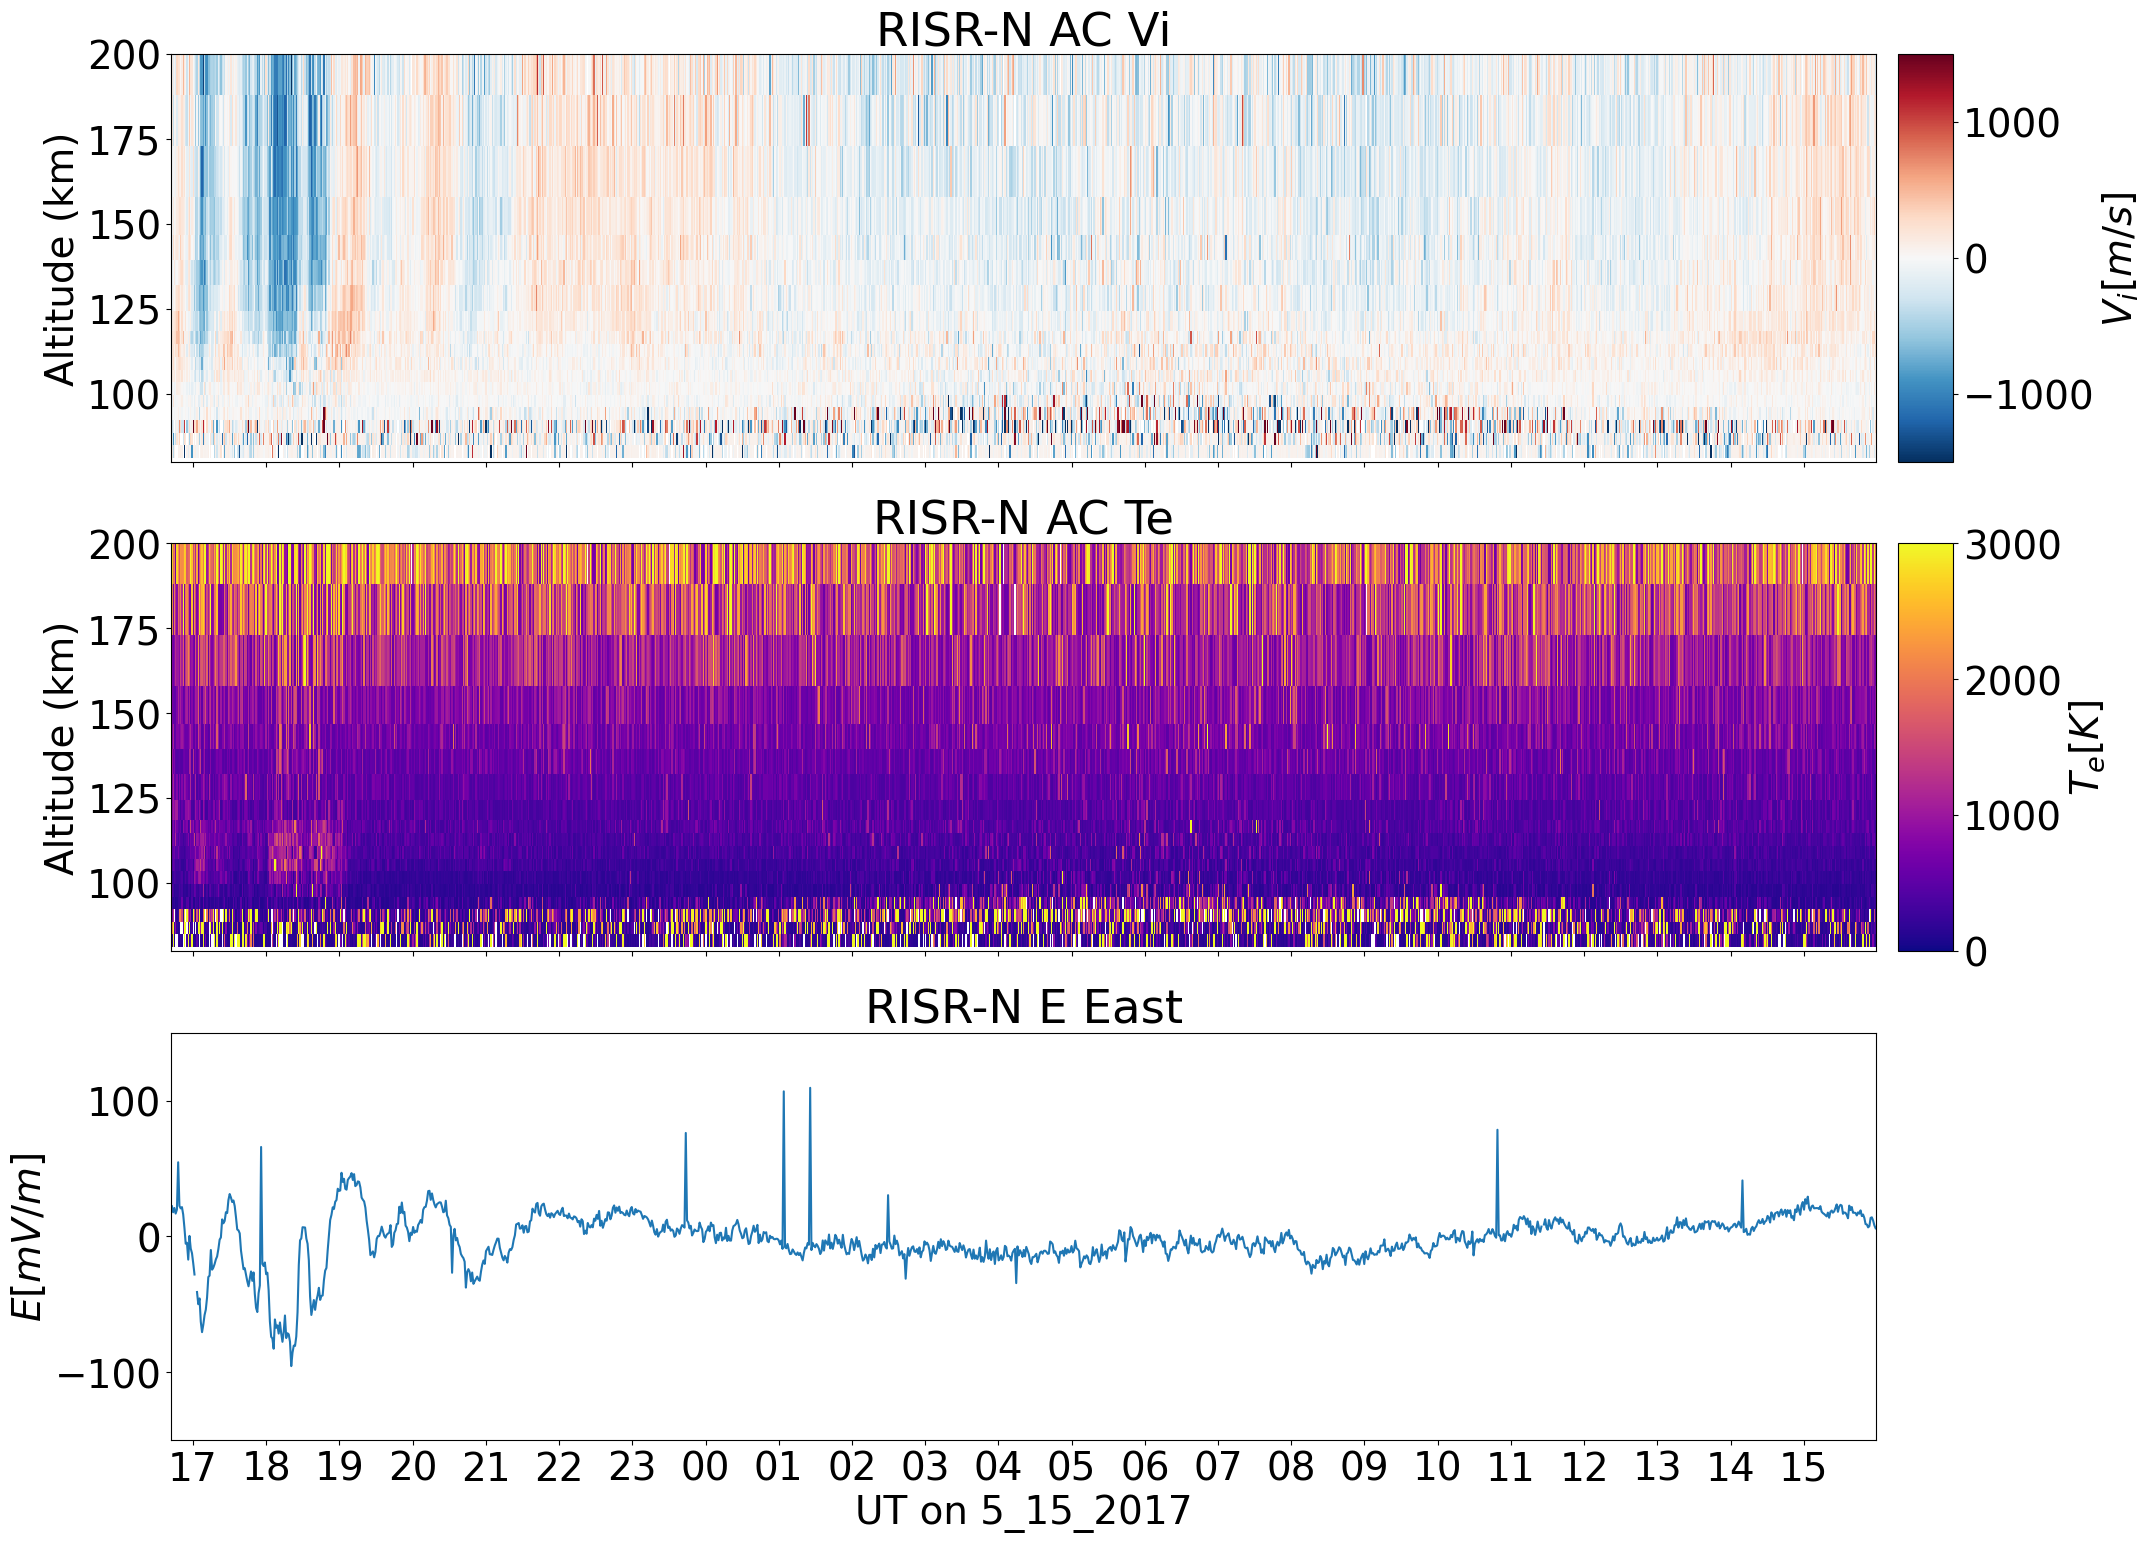

In [2]:
#FB 5-15-2017
bplot = 5
datadir = '/Users/alan/Downloads/AOS99/5_15_2017/'
lpfilename=datadir+'20170515.002_lp_1min-fitcal.h5'
# lpfilename = sys.argv[0]
flp=io_utils.read_whole_h5file(lpfilename)

#Alternating code data file
acfilename=datadir+'20170515.002_ac_1min-fitcal.h5'
# acfilename = sys.argv[1]
fac=io_utils.read_whole_h5file(acfilename)

#reconstructed vector velocities data file
vfilename=datadir+'20170515.002_lp_1min-fitcal-vvelsLat-60sec.h5'
# vfilename = sys.argv[2]
v=io_utils.read_whole_h5file(vfilename)

lp=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in flp['/Time']['UnixTime'][:,0]]
dtac=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in fac['/Time']['UnixTime'][:,0]]
dtv=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['/Time']['UnixTime'][:,0]]

plt.rcParams['figure.figsize']=22,18
plt.rcParams['font.size']=28
fig,axarr = plt.subplots(3,1,sharex=True)

goodaltsac=np.logical_not(np.isnan(fac['/FittedParams']['Altitude'][bplot,:]))
acclrs=axarr[0].pcolormesh(mdates.date2num(dtac),fac['/FittedParams']['Altitude'][bplot,goodaltsac]*1e-3,fac['/FittedParams']['Fits'][:,bplot,goodaltsac,0,-1].T,vmin=-1500,vmax=1500,cmap='RdBu_r')
axarr[0].set_title('RISR-N AC Vi')
axarr[0].set_ylabel('Altitude (km)')
axarr[0].set_ylim([80,200])

#colorbar in its own axis
box2=axarr[0].get_position()
cbarax2=fig.add_axes([box2.x0+box2.width+0.01, box2.y0, 0.025, box2.height])
cb2=plt.colorbar(acclrs,cax=cbarax2)
cb2.set_label(r'$V_{i} [m/s]$')

goodaltsac=np.logical_not(np.isnan(fac['/FittedParams']['Altitude'][bplot,:]))
acclrs=axarr[1].pcolormesh(mdates.date2num(dtac),fac['/FittedParams']['Altitude'][bplot,goodaltsac]*1e-3,fac['/FittedParams']['Fits'][:,bplot,goodaltsac,-1,1].T,vmin=0,vmax=3000,cmap='plasma')
axarr[1].set_title('RISR-N AC Te')
axarr[1].set_ylabel('Altitude (km)')
axarr[1].set_ylim([80,200])

#colorbar in its own axis
box2=axarr[1].get_position()
cbarax2=fig.add_axes([box2.x0+box2.width+0.01, box2.y0, 0.025, box2.height])
cb2=plt.colorbar(acclrs,cax=cbarax2)
cb2.set_label(r'$T_e [K]$')

axarr[-1].plot(mdates.date2num(dtv),v['/VectorVels']['Eest'][:,4,1].T*1e3)
axarr[-1].set_title('RISR-N E East')
axarr[-1].set_ylabel(r'$E [mV/m]$')
axarr[-1].set_ylim([-150,150])


# axarr[-1].set_xlim([mdates.date2num(datetime.datetime(2016,8,2,12,0,0)),mdates.date2num(datetime.datetime(2016,8,3,0,0,0))])
axarr[-1].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
axarr[-1].xaxis.set_major_locator(mdates.HourLocator())
axarr[-1].set_xlabel('UT on 5_15_2017')
#plt.savefig('FBExample.png',format='png',dpi=400,bbox_inches='tight')

8


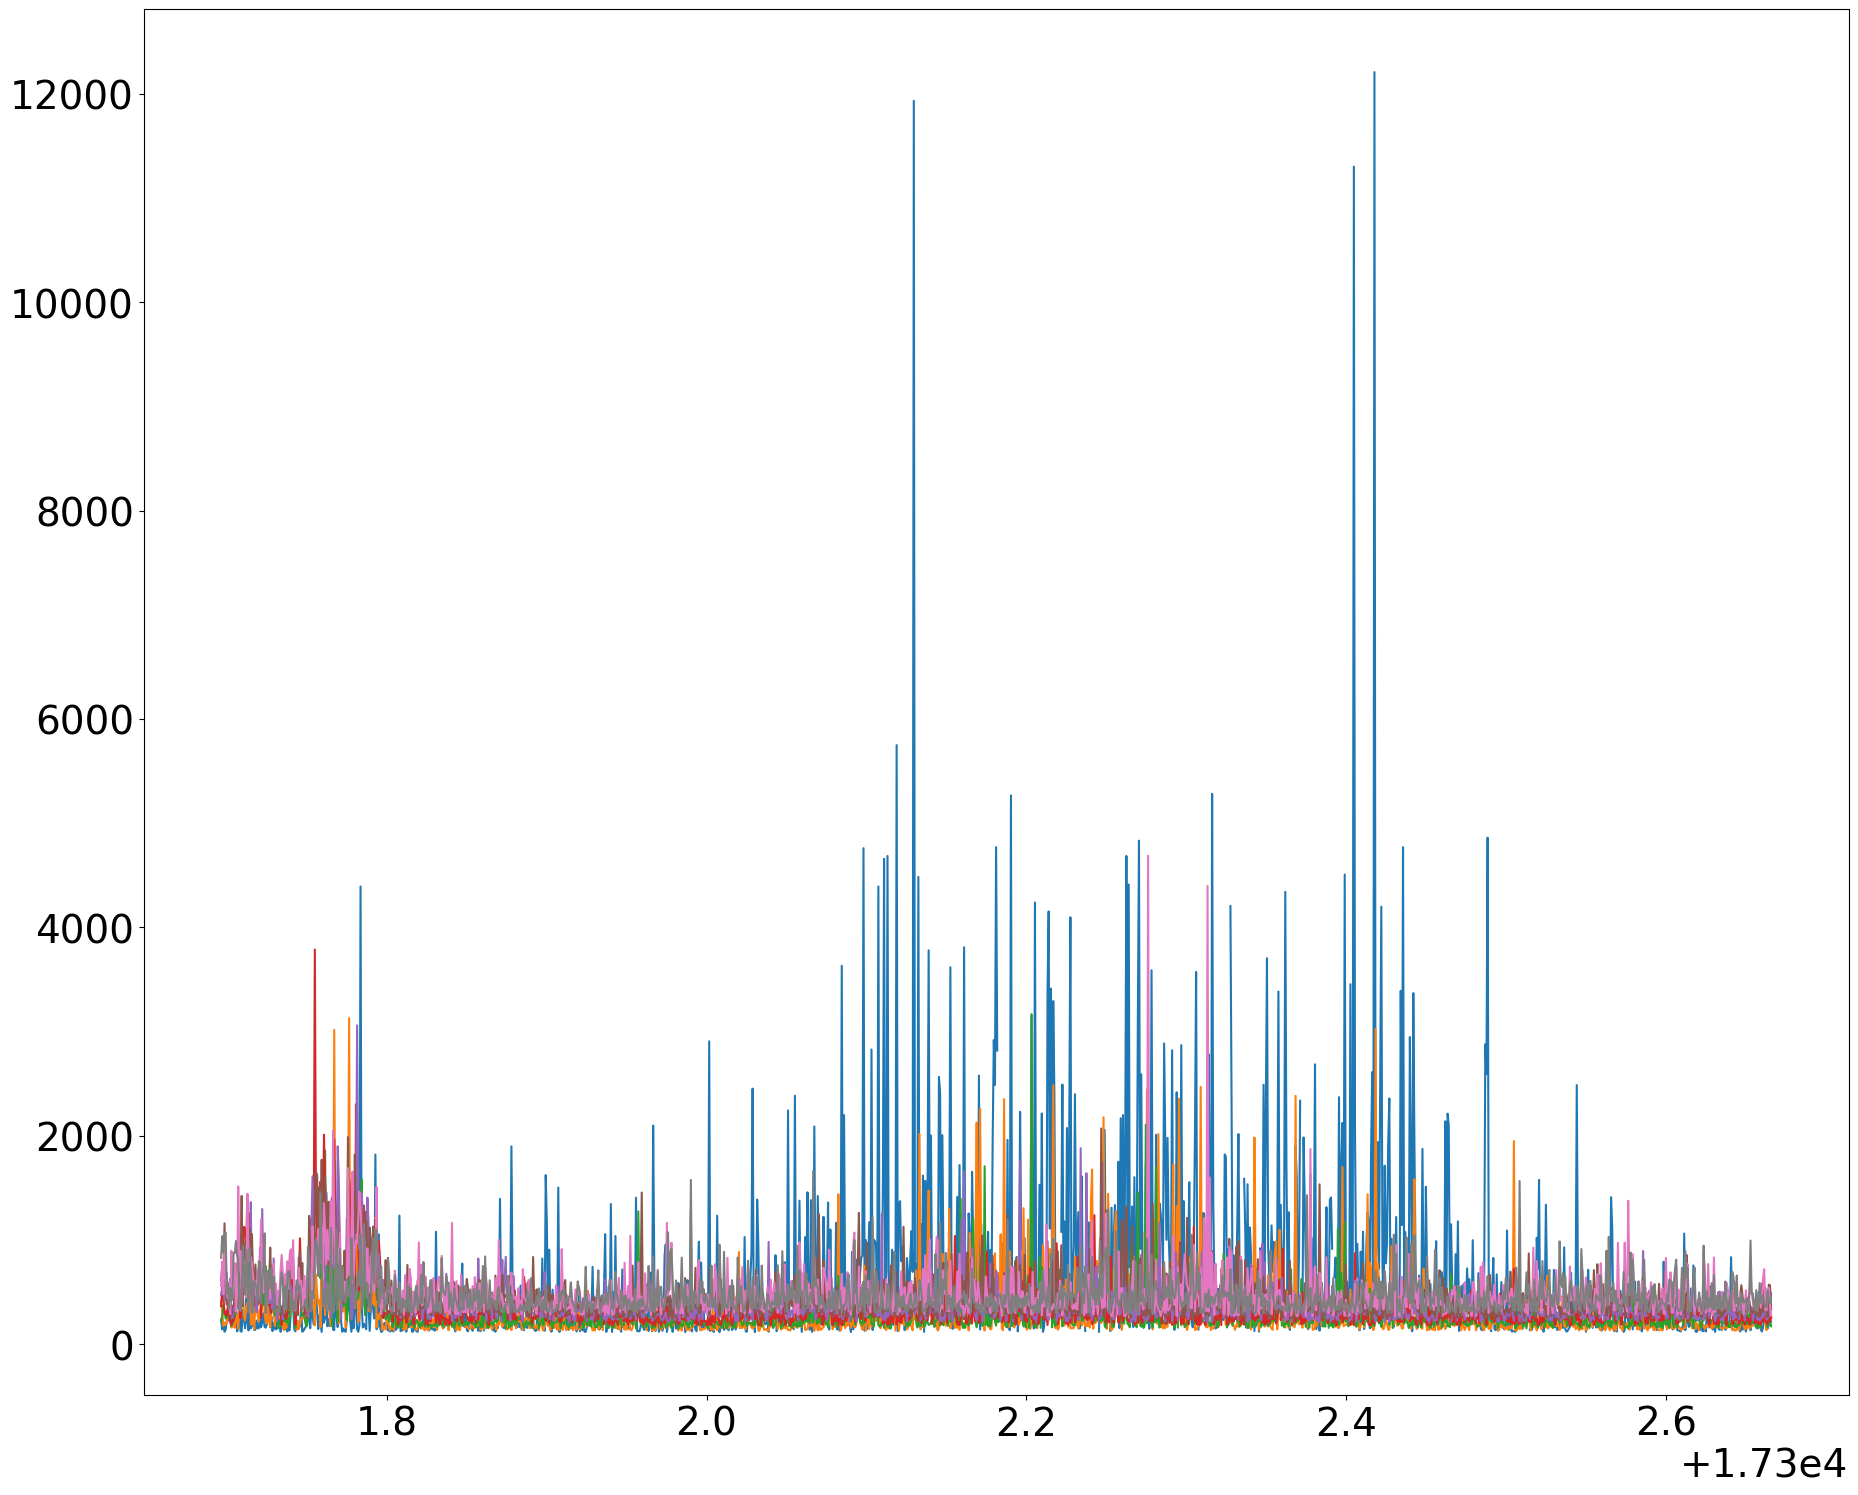

In [3]:
# plt.plot(fac['/FittedParams']['Altitude'][bplot,goodaltsac]*1e-3,fac['/FittedParams']['Fits'][:,bplot,goodaltsac,-1,1].T)
# plt.plot(fac['/FittedParams']['Altitude'][bplot,goodaltsac]*1e-3)
# plt.plot(range(100,125),fac['/FittedParams']['Fits'][:,bplot,goodaltsac,-1,1].T)
print(len(fac['/FittedParams']['Fits'][:,bplot,goodaltsac,-1,1].T[3:11]))
plt.plot(mdates.date2num(dtac),fac['/FittedParams']['Fits'][:,bplot,goodaltsac,-1,1].T[3:11].T)

[ 83.04474578  86.7556065   90.46746809  94.18032046  97.89416401
 101.60899702 105.32481571 109.04162048 112.75941595 116.47818571
 120.81811749 128.26089131 135.70756586 143.15812779 150.6130509
 165.53350272 180.4693012  195.42034087 210.38730514 232.86472626
 255.37563596 277.91969159 300.49656377 323.10592293 345.74742781]
25
25


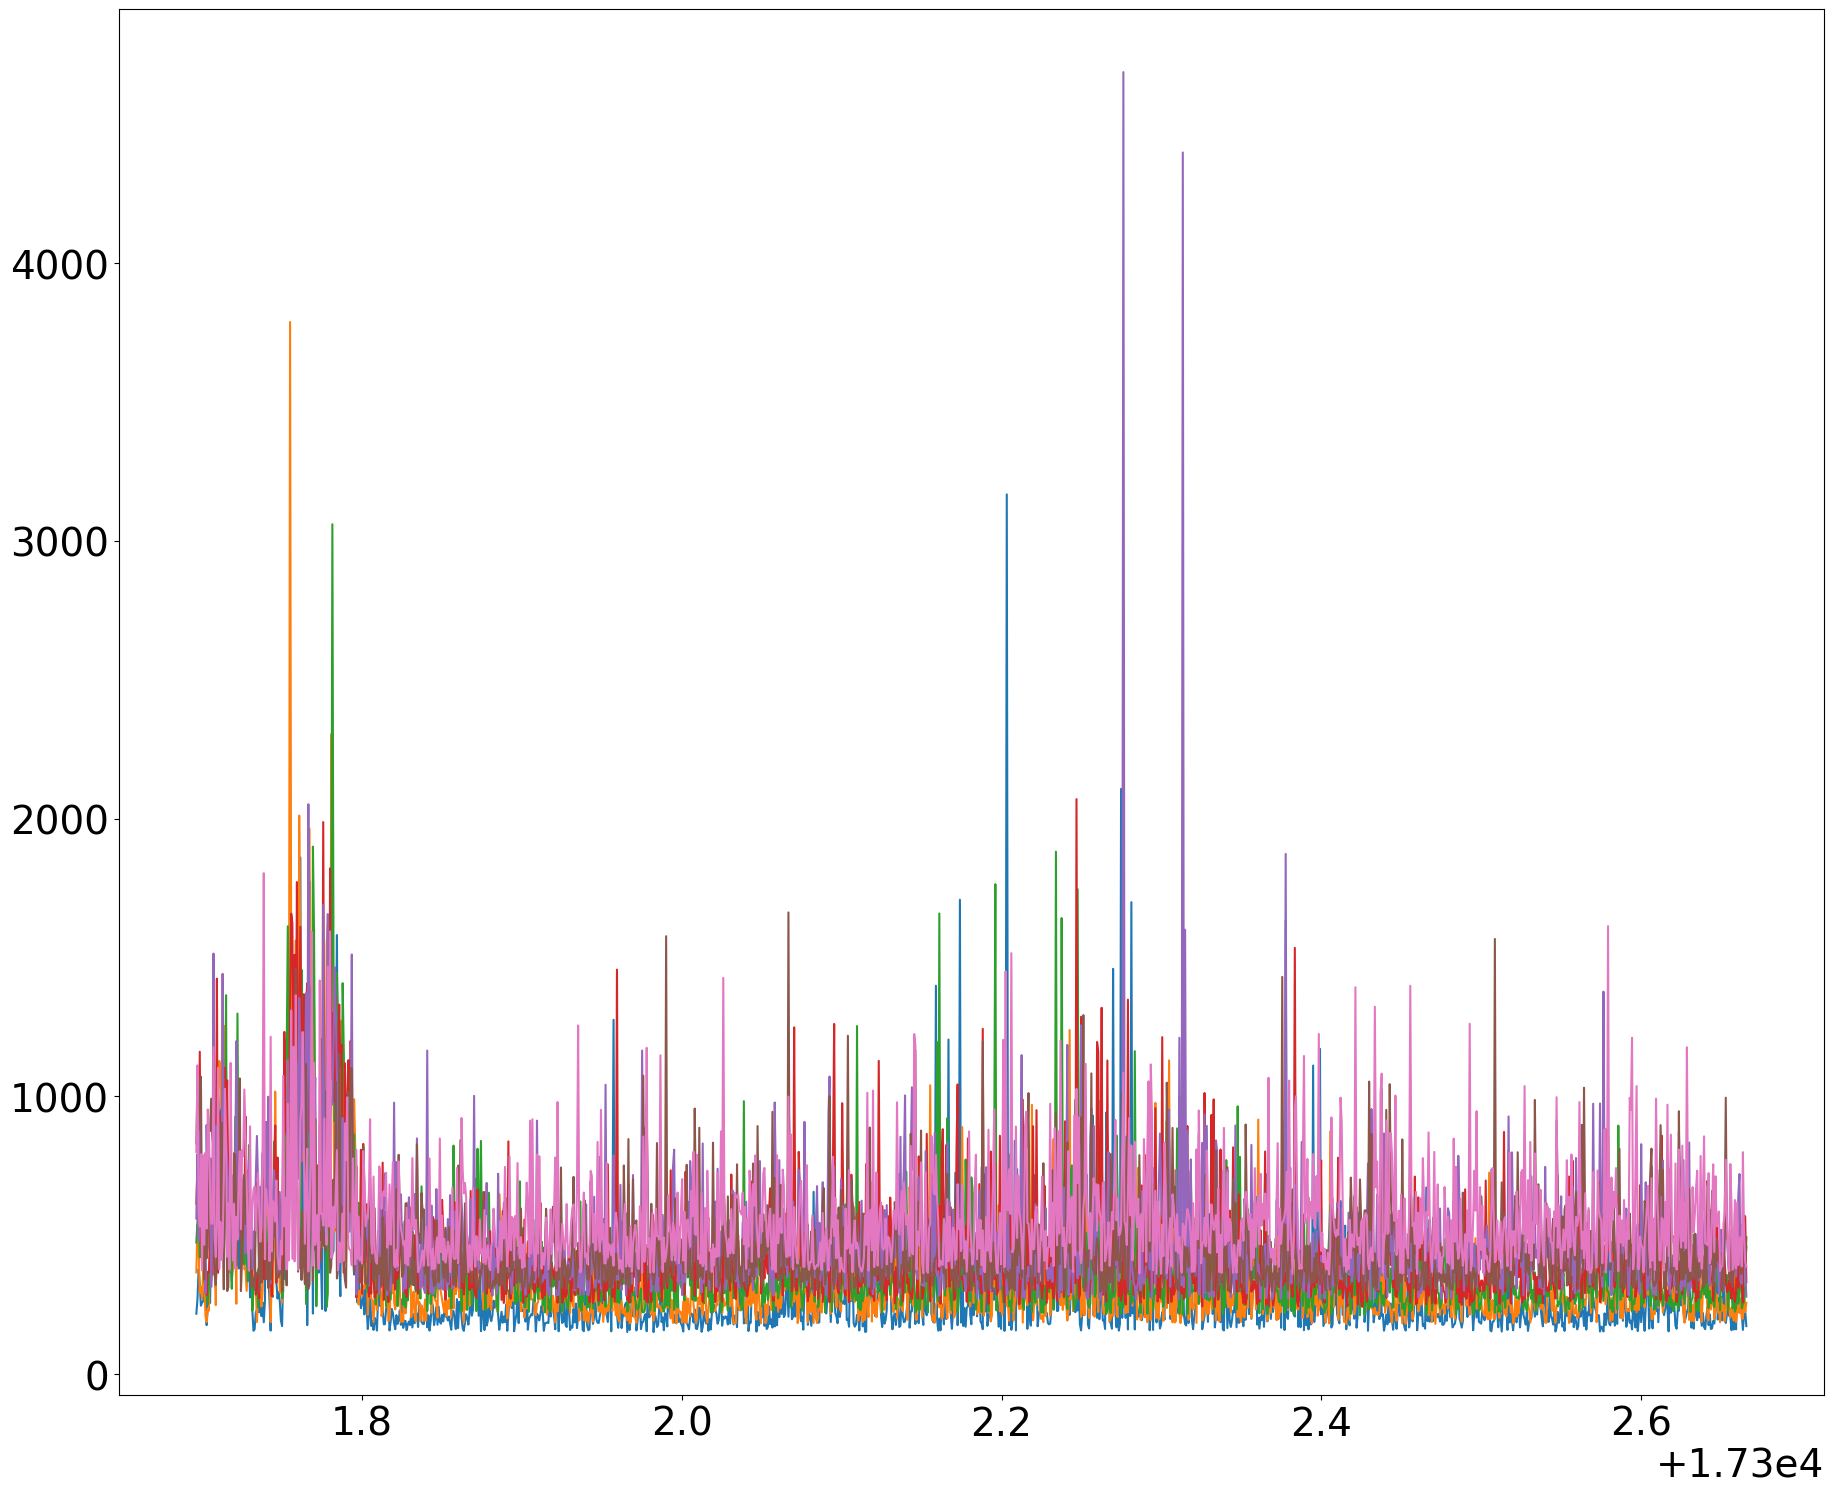

In [4]:
print(fac['/FittedParams']['Altitude'][bplot,goodaltsac]*1e-3)
# fac['/FittedParams']['Altitude'][bplot,goodaltsac][5:12]*1e-3
plt.plot(mdates.date2num(dtac),fac['/FittedParams']['Fits'][:,bplot,goodaltsac,-1,1].T[5:12].T)
print(np.size(fac['/FittedParams']['Altitude'][bplot,goodaltsac]*1e-3))
print(len(fac['/FittedParams']['Fits'][:,bplot,goodaltsac,-1,1].T))

In [5]:
mdates.date2num(dtac),fac['/FittedParams']['Fits'][:,bplot,goodaltsac,-1,1].T[5:12].T

(array([17301.69634259, 17301.69704861, 17301.6977662 , ...,
        17302.66444444, 17302.66516204, 17302.66587963]),
 array([[ 217.69983701,  366.71916648,  474.04196686, ...,  560.32943079,
          830.58376207,  799.98414586],
        [ 270.43073618,  539.3462628 ,  554.44990731, ...,  793.35111757,
         1038.32762259, 1112.11455427],
        [ 378.79602686,  460.45386402,  631.68369646, ...,  481.25212193,
          878.38906719,  583.78416593],
        ...,
        [ 215.35925962,  308.41815701,  260.58481914, ...,  541.47981405,
          427.16018798,  493.09978981],
        [ 228.24354988,  223.15684438,  317.40606791, ...,  385.47163026,
          393.03416969,  402.85209152],
        [ 173.22162824,  256.95944674,  493.48079862, ...,  279.28578773,
          458.28242526,  387.09540705]]))

In [6]:
dbf = pd.read_csv('2009_2022CompleteMag')

In [7]:
print(len(mdates.date2num(dtac)), len(fac['/FittedParams']['Fits'][:,bplot,goodaltsac,-1,1].T[5:12].T))
print(len(flp['/Time']['UnixTime'][:,0]))

1357 1357
1357


In [8]:
def magnitude(vector):
    return np.sqrt(sum(pow(element, 2) for element in vector))
# radTemps = []
# for i in range(len(magnitude(fac['/FittedParams']['Fits'][:,bplot,goodaltsac,-1,1].T[3:11]))):
#     radTemps.append(magnitude(fac['/FittedParams']['Fits'][:,bplot,goodaltsac,-1,1].T[3:11][:,i]))

# plt.plot(mdates.date2num(dtac),fac['/FittedParams']['Fits'][:,bplot,goodaltsac,-1,1].T[3:11].T[:,5])
# print(len(radTemps))
# print(len())
# fac['/FittedParams']['Altitude'][bplot,goodaltsac][5:12]*1e-3,fac['/FittedParams']['Fits'][:,bplot,goodaltsac,-1,1].T[5:12]
# for j in fac['/FittedParams']['Altitude'][bplot,goodaltsac][5:12]*1e-3:
#     j = magnitude(j)
h = []
w = []
for i in fac['/FittedParams']['Fits'][:,bplot,goodaltsac,-1,1].T[5:12].T:
    h.append(magnitude(i))
    # if(dbf['Date_UTC'])
print(flp['/Time']['UnixTime'][:,0])
data = {'DateTime' : flp['/Time']['UnixTime'][:,0], 'Temps': h}
dtf = pd.DataFrame(data)
dtf.head()

[1494866564 1494866625 1494866687 ... 1494950208 1494950270 1494950332]


,DateTime,Temps
0,1494866564,1557.972713
1,1494866625,2044.000321
2,1494866687,1550.720216
3,1494866749,2006.824323
4,1494866811,1692.058583


In [93]:
# h = []
# w = []
# mdates.date2num(dtv),v['/VectorVels']['Eest'][:,4,1].T*1e3
print(v['/VectorVels']['Eest'][:,4,1].T*1e3)
# for i in v['/VectorVels']['Eest'][:,4,1].T*1e3:
#     h.append(magnitude(i))
print(flp['/Time']['UnixTime'][:,0])
data = {'DateTime' : flp['/Time']['UnixTime'][:,0], 'Vels': v['/VectorVels']['Eest'][:,4,1].T*1e3}
dvf = pd.DataFrame(data)
dvf.head()

[22.22840717 17.7674933  20.90854055 ... 11.58339705  8.08932085
  5.94875279]
[1494866564 1494866625 1494866687 ... 1494950208 1494950270 1494950332]


,DateTime,Vels
0,1494866564,22.228407
1,1494866625,17.767493
2,1494866687,20.908541
3,1494866749,16.788845
4,1494866811,19.760121


In [9]:
# print(dtac)
print(mdates.date2num(dbf['Date_UTC']))

[14245.         14245.00069444 14245.00138889 ... 19357.99791667
 19357.99861111 19357.99930556]


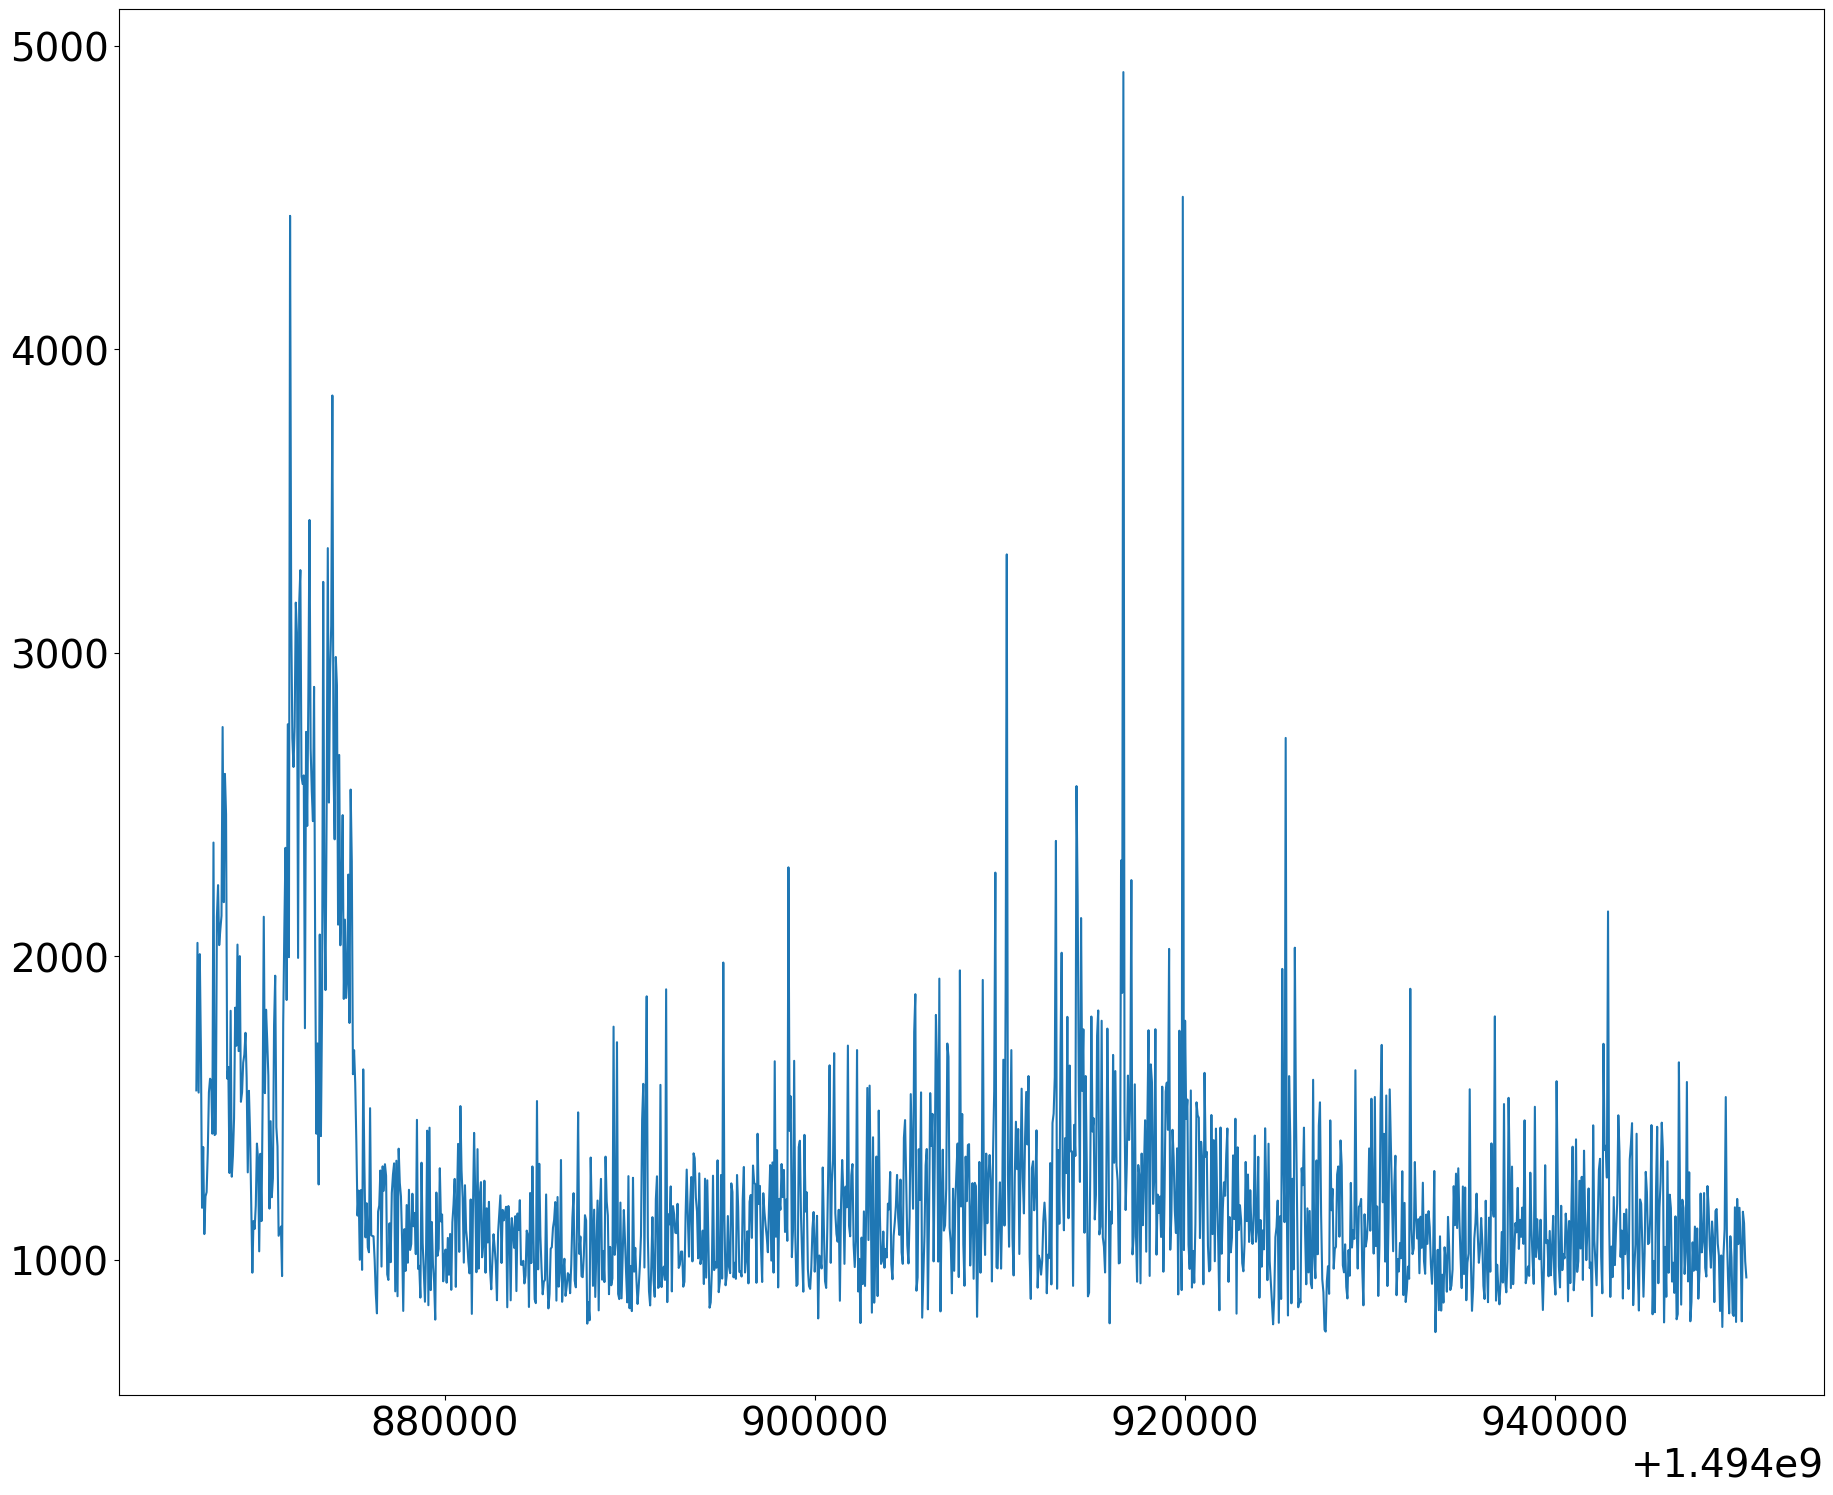

In [10]:
plt.plot(dtf['DateTime'],dtf['Temps'])

In [11]:

# plt.plot(dbf['dbn_nez'])

In [12]:
# datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in fac['/Time']['UnixTime'][:,0]
print(fac['/Time']['UnixTime'][:,0])
print(dtac)

[1494866564 1494866625 1494866687 ... 1494950208 1494950270 1494950332]
[datetime.datetime(2017, 5, 15, 16, 42, 44), datetime.datetime(2017, 5, 15, 16, 43, 45), datetime.datetime(2017, 5, 15, 16, 44, 47), datetime.datetime(2017, 5, 15, 16, 45, 49), datetime.datetime(2017, 5, 15, 16, 46, 51), datetime.datetime(2017, 5, 15, 16, 47, 52), datetime.datetime(2017, 5, 15, 16, 48, 54), datetime.datetime(2017, 5, 15, 16, 49, 56), datetime.datetime(2017, 5, 15, 16, 50, 58), datetime.datetime(2017, 5, 15, 16, 51, 59), datetime.datetime(2017, 5, 15, 16, 53, 1), datetime.datetime(2017, 5, 15, 16, 54, 3), datetime.datetime(2017, 5, 15, 16, 55, 5), datetime.datetime(2017, 5, 15, 16, 56, 7), datetime.datetime(2017, 5, 15, 16, 57, 8), datetime.datetime(2017, 5, 15, 16, 58, 10), datetime.datetime(2017, 5, 15, 16, 59, 12), datetime.datetime(2017, 5, 15, 17, 0, 14), datetime.datetime(2017, 5, 15, 17, 1, 15), datetime.datetime(2017, 5, 15, 17, 2, 17), datetime.datetime(2017, 5, 15, 17, 3, 19), datetime.dat

In [13]:
# dbf_dates = dbf['Date_UTC'][194400:195839]
# dbf_dbn = dbf['dbn_nez'][194400:195839]
# datetime.datetime(2009, 1, 1, 0, 0)
dbf_time = [datetime.datetime(1970, 1, 1, 0, 0) + datetime.timedelta(seconds=int(t)) for t in range(7888320)]
# time.mktime(t.timetuple())
# utc = [datetime.strptime(t, '%Y-%m-%dT%H:%M:%S') for t in dbf['Date_UTC']]
# datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in dbf['Date_UTC'][]

# Tell the datetime object that it's in UTC time zone since 
# datetime objects are 'naive' by default
# utc = utc.replace(tzinfo=from_zone)
# print(utc)
# dbf_dates = mdates.date2num([datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in dbf['Date_UTC'][:,0]])
print(len(dbf_time))
print(len(dbf['dbn_nez']))

7888320
7888320


In [14]:
dtf.to_csv('dtfcsv.csv')

In [26]:
print(dtf['DateTime'])
print(mdates.date2num(dbf['Date_UTC'])*1e5)
# 1494866564
# 1424500069.444

0       1494866564
1       1494866625
2       1494866687
3       1494866749
4       1494866811
           ...    
1352    1494950085
1353    1494950146
1354    1494950208
1355    1494950270
1356    1494950332
Name: DateTime, Length: 1357, dtype: int32
[1.42450000e+09 1.42450007e+09 1.42450014e+09 ... 1.93579979e+09
 1.93579986e+09 1.93579993e+09]


In [48]:
# diff = []
# for i in range(dtf['DateTime'][0],dtf['DateTime'][len(dtf['DateTime'])-1]):
#     diff.append(dtf['DateTime'][i] - mdates.date2num(dbf['Date_UTC'])[i]*1e5)

# [dtf['DateTime'][0],dtf['DateTime'][len(dtf['DateTime'])-1]]

# diff = dtf['DateTime'] - mdates.date2num(dbf['Date_UTC'])[dtf['DateTime'][0]:dtf['DateTime'][len(dtf['DateTime'])-1]]*1e5
print(dtf['DateTime'][0] - mdates.date2num(dbf['Date_UTC'])[0]*1e5)
print(dtf['DateTime'][1] - mdates.date2num(dbf['Date_UTC'])[1]*1e5)

print()
# print(np.mean(np.array(diff)))


70366564.0
70366555.55555558



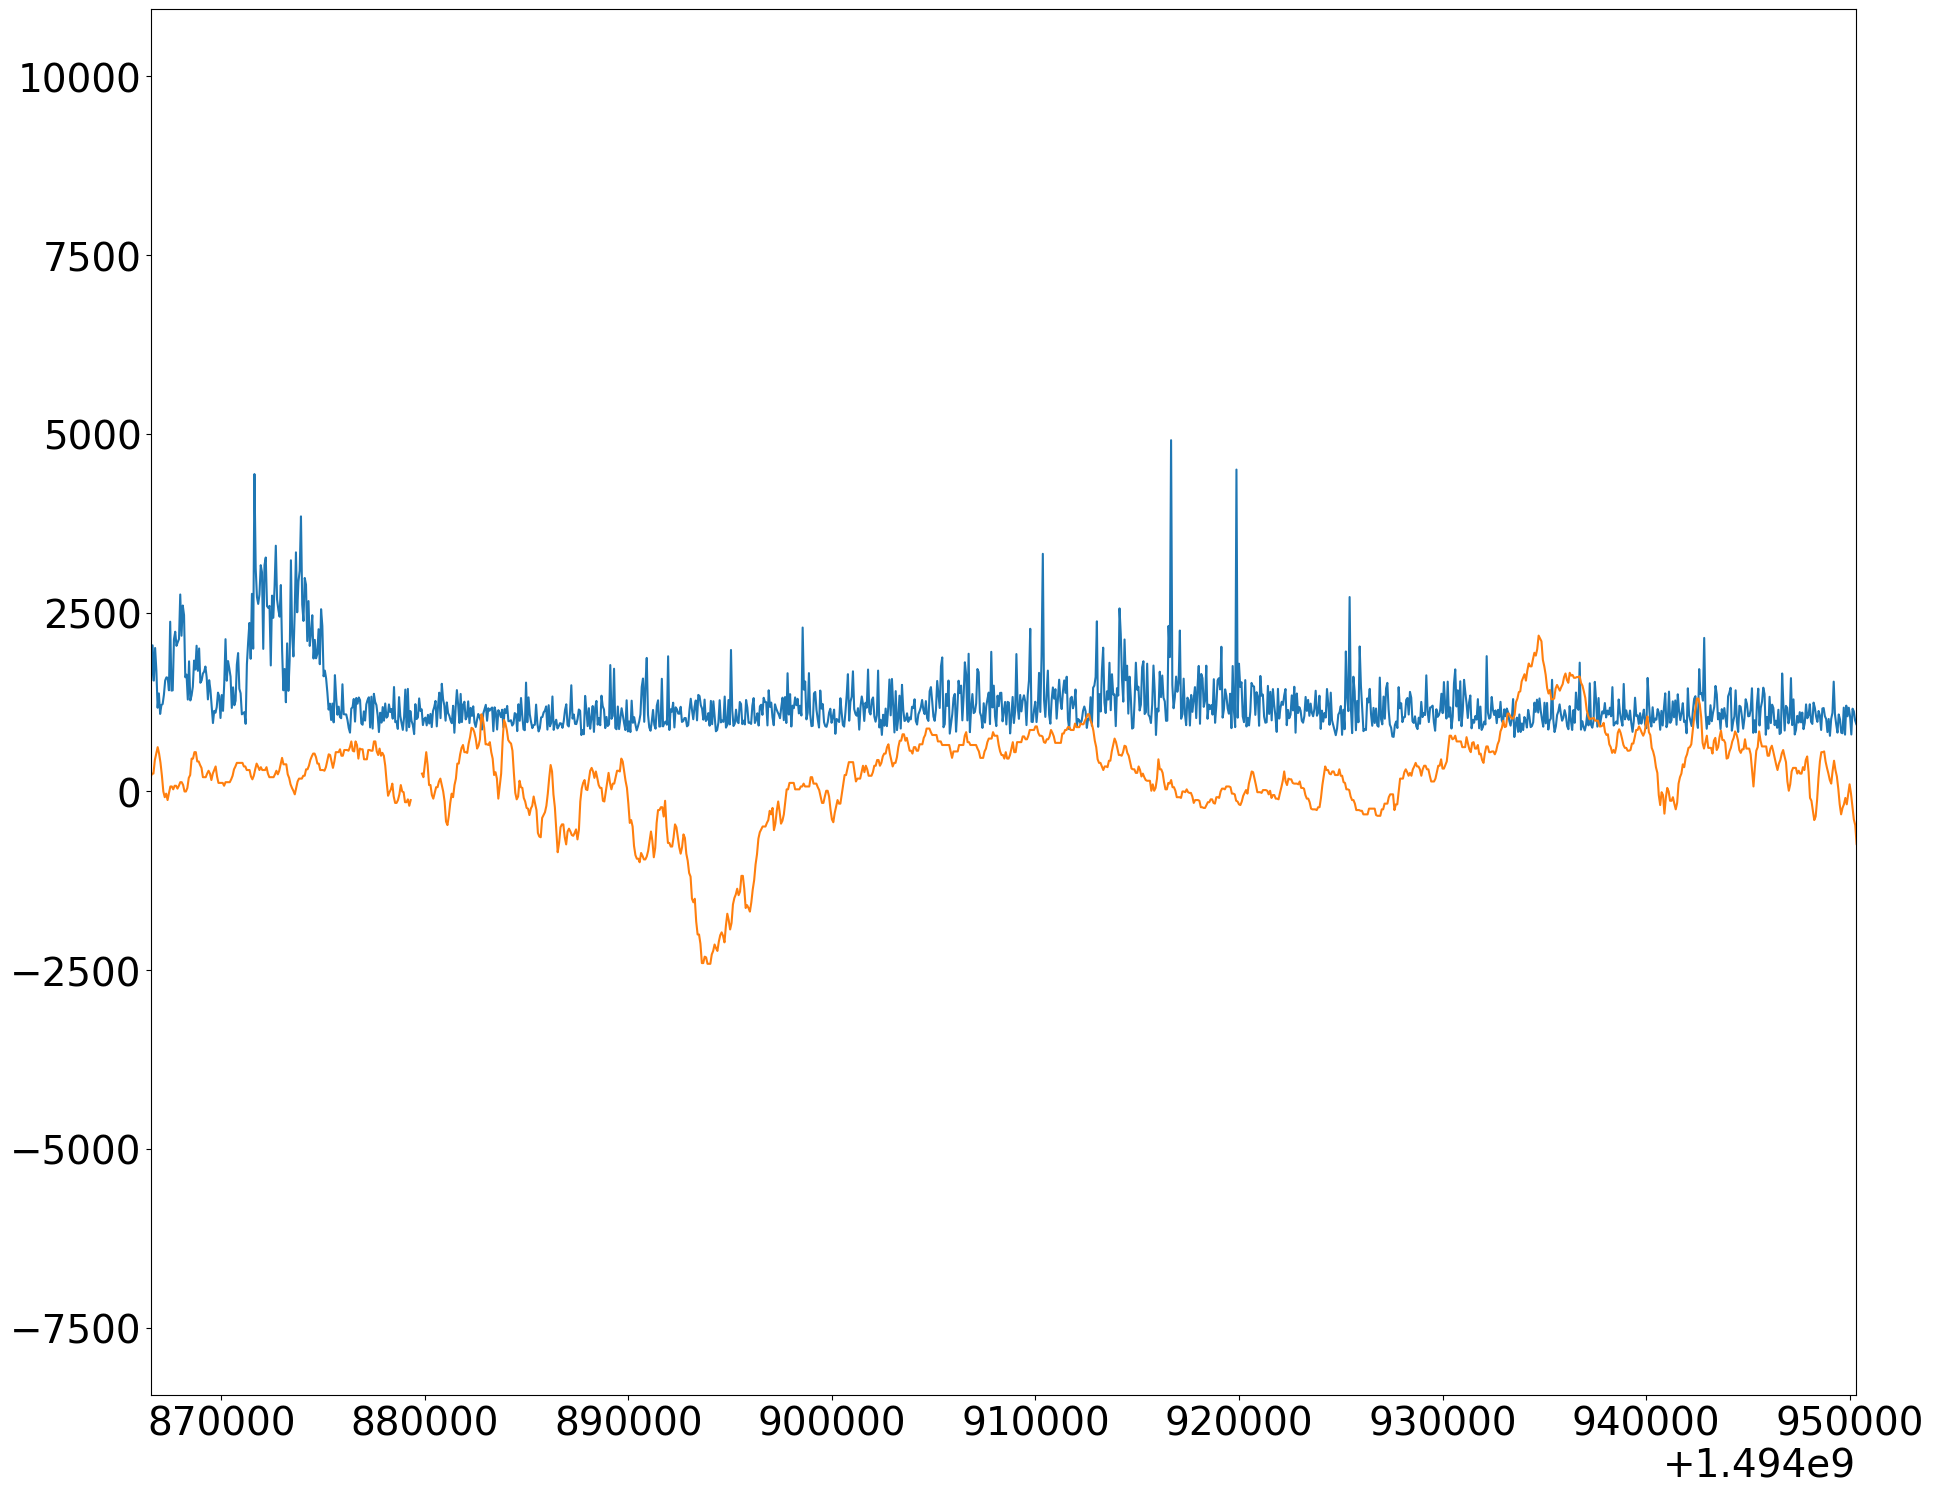

In [38]:
# plt.plot(dbf['Date_UTC'],dbf['dbn_nez'])
plt.plot(dtf['DateTime'], dtf['Temps'])
plt.xlim(dtf['DateTime'][0],dtf['DateTime'][len(dtf['DateTime'])-1])
plt.ylim(dtf['Temps'][0]-1e4,dtf['Temps'][len(dtf['Temps'])-1]+1e4)
plt.plot(mdates.date2num(dbf['Date_UTC'])*1e5,dbf['dbn_nez']*100)
plt.show()

In [68]:
print(dtf['DateTime'][0])
dt = datetime.datetime.fromtimestamp(dtf['DateTime'].iloc[0])
dt2 = datetime.datetime.fromtimestamp(dtf['DateTime'].iloc[-1])
print(dt)
strdt = str(dt).replace(" ", "T")[:-2]+"00"
print(strdt)
print(dt2)
strdt2 = str(dt2).replace(" ", "T")[:-2]+"00"
print(strdt2)

start_time = dbf.index[dbf['Date_UTC'] == strdt].tolist()[0]
stop_time = dbf.index[dbf['Date_UTC'] == strdt2].tolist()[0]

print(start_time)
print(stop_time)

# print(dbf.index[dbf['Date_UTC'] == strdt].tolist())
# print(dbf.index[dbf['Date_UTC'] == strdt2].tolist())



1494866564
2017-05-15 09:42:44
2017-05-15T09:42:00
2017-05-16 08:58:52
2017-05-16T08:58:00
4926822
4928218


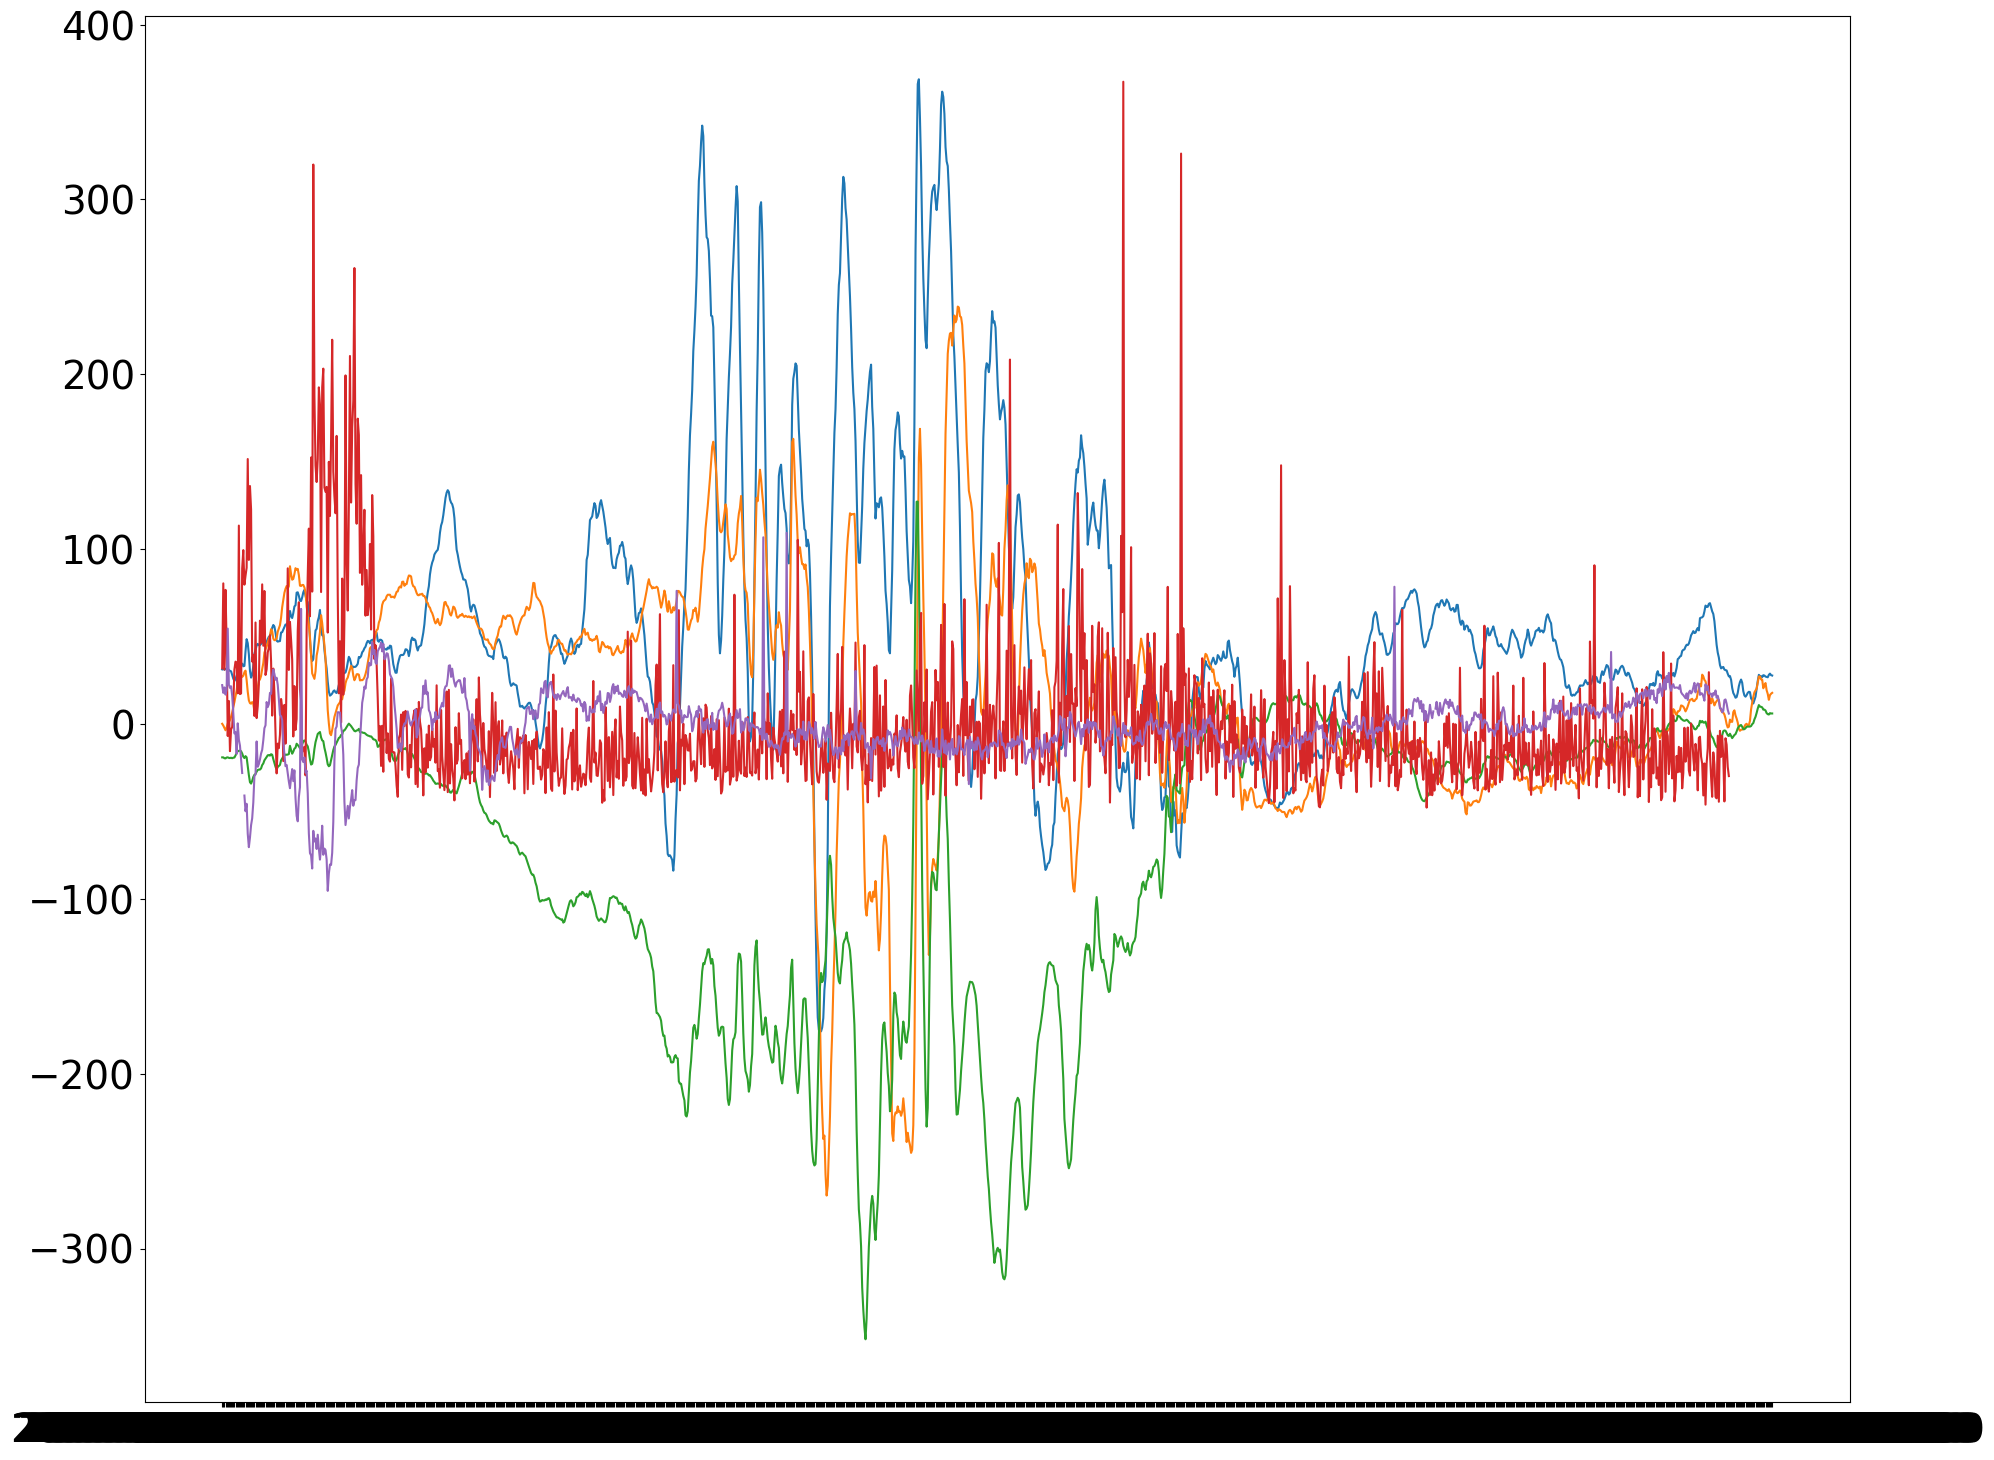

In [110]:
# start_time = start_time - 10000
# stop_time = stop_time - 10000

plt.plot(dbf['Date_UTC'][start_time:stop_time],dbf['dbn_nez'][start_time:stop_time])
plt.plot(dbf['Date_UTC'][start_time:stop_time],dbf['dbe_nez'][start_time:stop_time])
plt.plot(dbf['Date_UTC'][start_time:stop_time],dbf['dbz_nez'][start_time:stop_time])

# plt.plot(dbf['dbn_nez'][start_time:stop_time])
# plt.plot(dbf['dbe_nez'][start_time:stop_time])
# plt.plot(dbf['dbz_nez'][start_time:stop_time])
plt.plot(dtf['Temps']/10-np.mean(dtf['Temps']/10))
plt.plot(dvf['Vels'])

ValueError: x and y must have same first dimension, but have shapes (1357,) and (2880,)

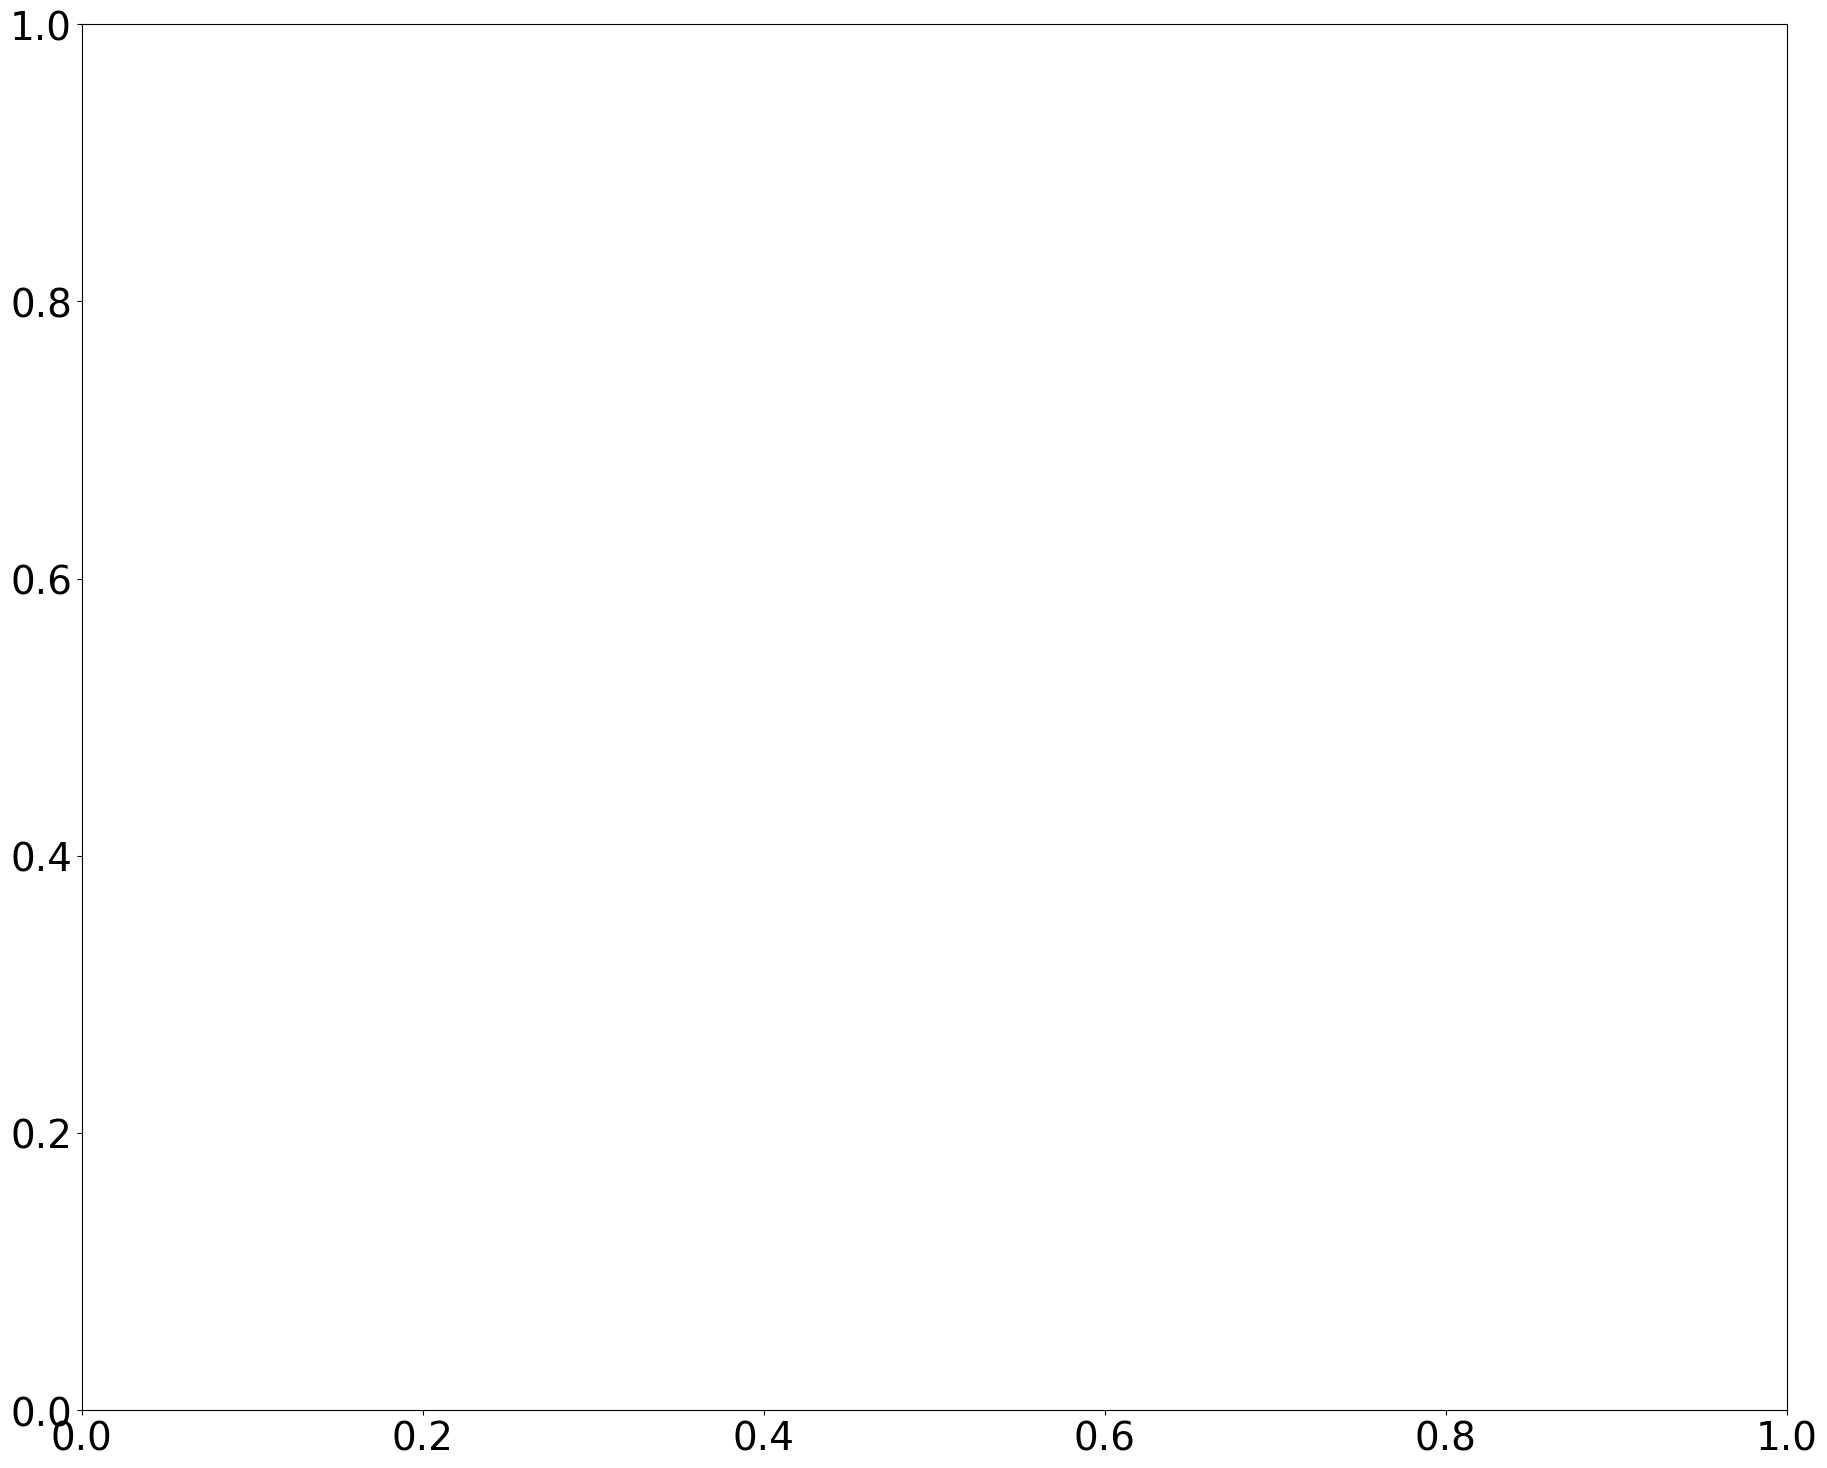

In [ ]:
mags = pd.read_csv('/Users/alan/Downloads/AOS99/5_15_2017/mag.csv', header = 0)
plt.plot(mags['dbn_nez'], label = "n mag")
plt.plot(mags['dbe_nez'], label = "e mag")
plt.plot(mags['dbz_nez'], label = "z mag")
plt.plot(dtf['DateTime'],dtf['Temps'])
plt.legend()

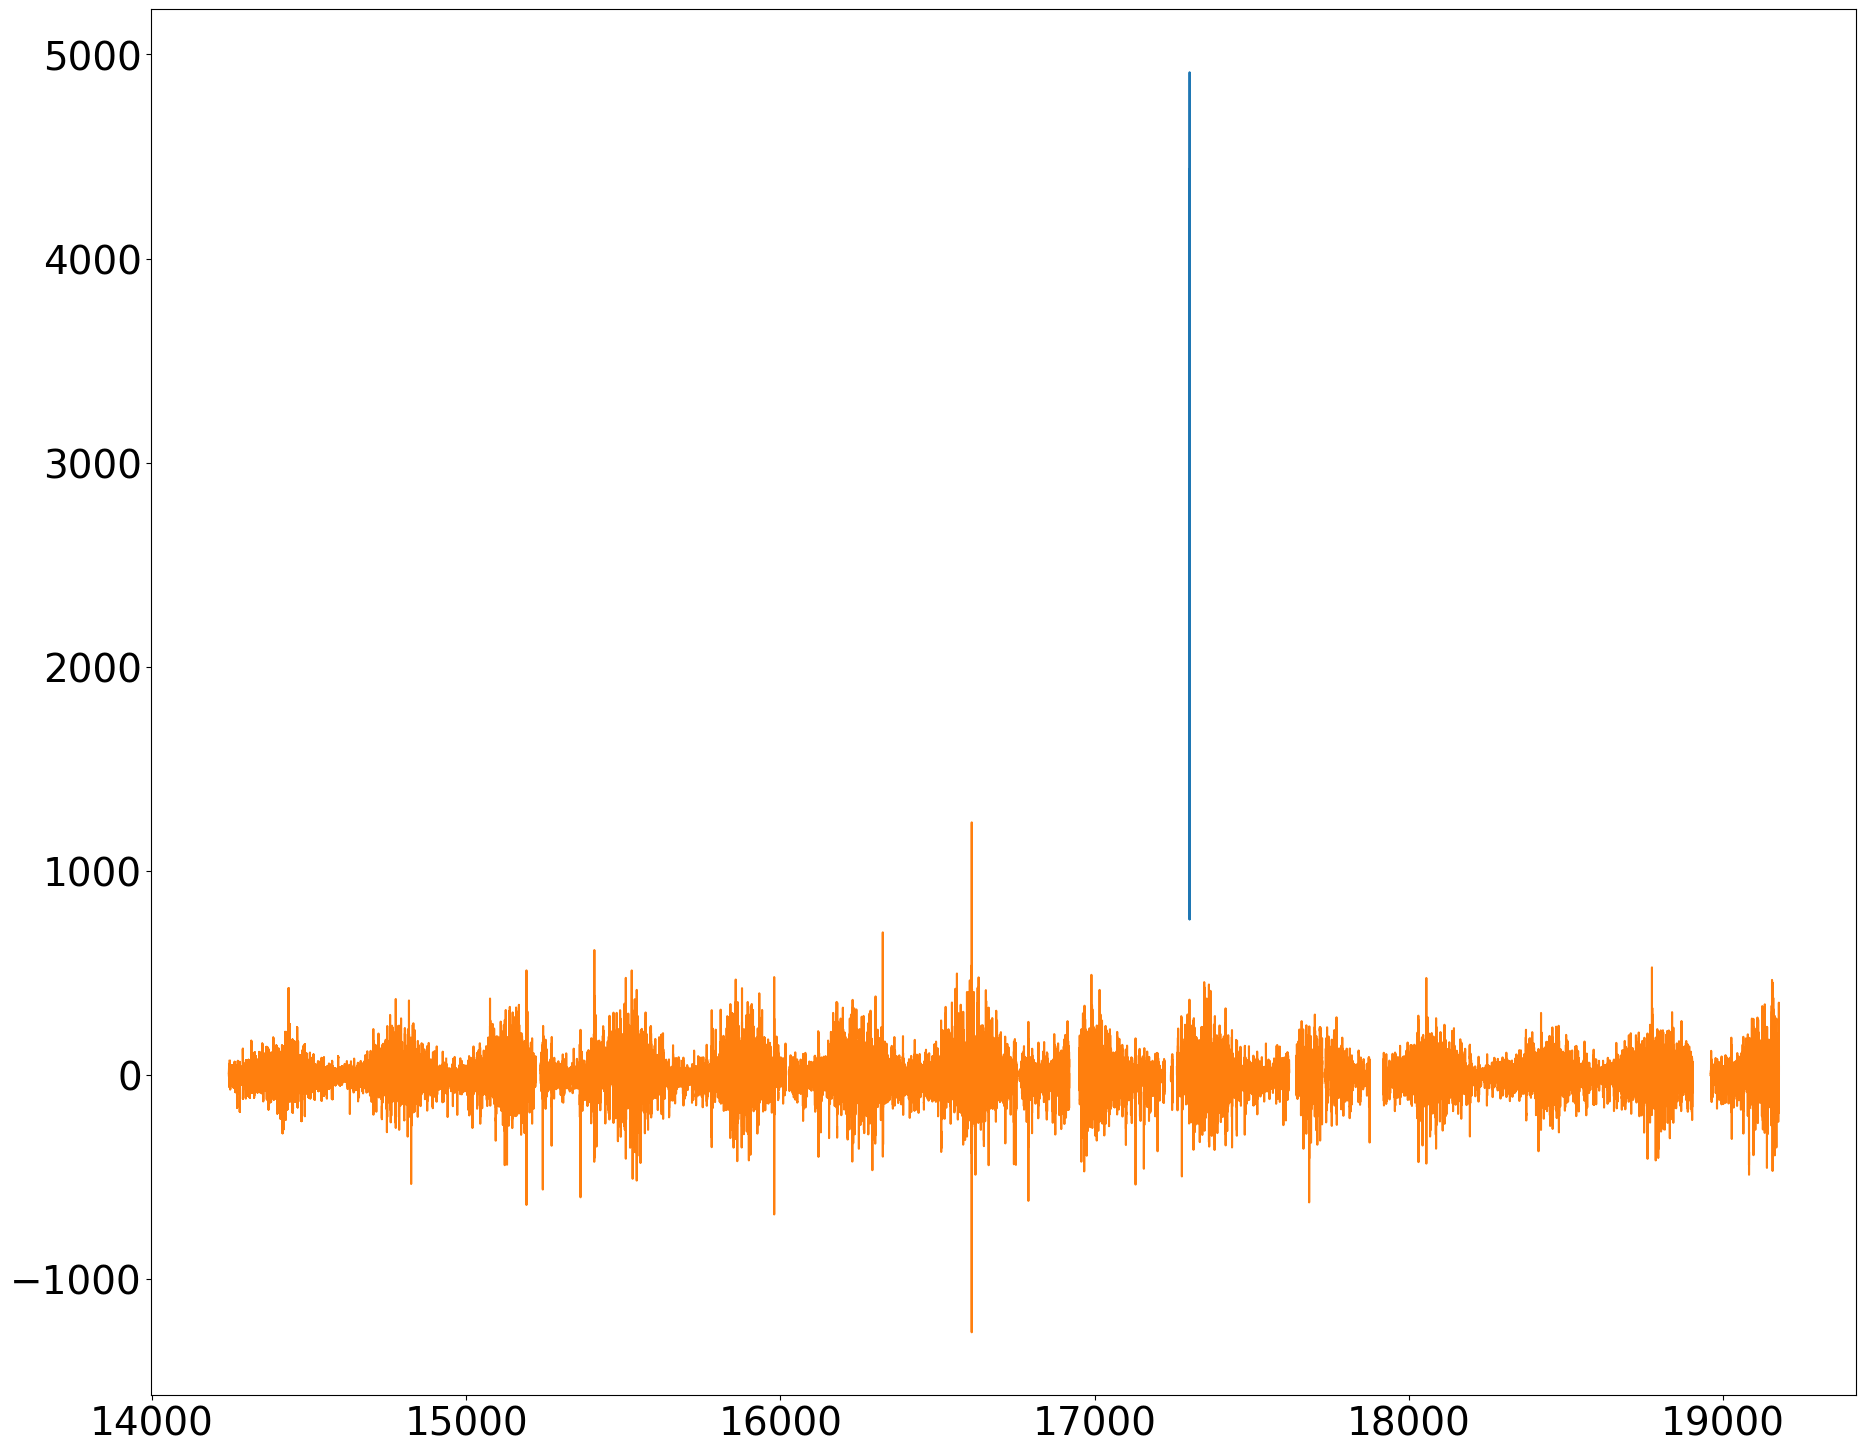

In [ ]:
# plt.plot(dtf['DateTime'],dtf['Temps']) 
# [194400:195839]
# [17300:17320]

plt.plot(dtf['DateTime'], dtf['Temps'])
# print(dtf['DateTime'].index)
# print(dbf['dbn_nez'].index)
# print(mdates.date2num(dbf['Date_UTC']))
# w = pd.DataFrame(mdates.date2num(dbf['Date_UTC']))
# w.to_csv('mbdates.csv')
# print(dbf[mdates.date2num(dbf['Date_UTC'])=='17301'].index.values)

# [17301:2*17301]
plt.plot(mdates.date2num(dbf['Date_UTC']), dbf['dbn_nez'])

# plt.xlim(dtf['DateTime'], dtf['Temps'])

In [ ]:
# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
# Additional feature
# Making the plot line (Blue one) more smooth
def viz_polymonial_smooth():
    X_grid = np.arange(min(X), max(X), 0.1)
    X_grid = X_grid.reshape(len(X_grid), 1) #Why do we need to reshape? (https://www.tutorialspoint.com/numpy/numpy_reshape.htm)
    # Visualizing the Polymonial Regression results
    plt.scatter(X, y, color='red')
    plt.plot(X_grid, pol_reg.predict(poly_reg.fit_transform(X_grid)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
  r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  r2_test = r2_score(Y_test, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

1357 1357
420.3524929530183
0.04650188611201034


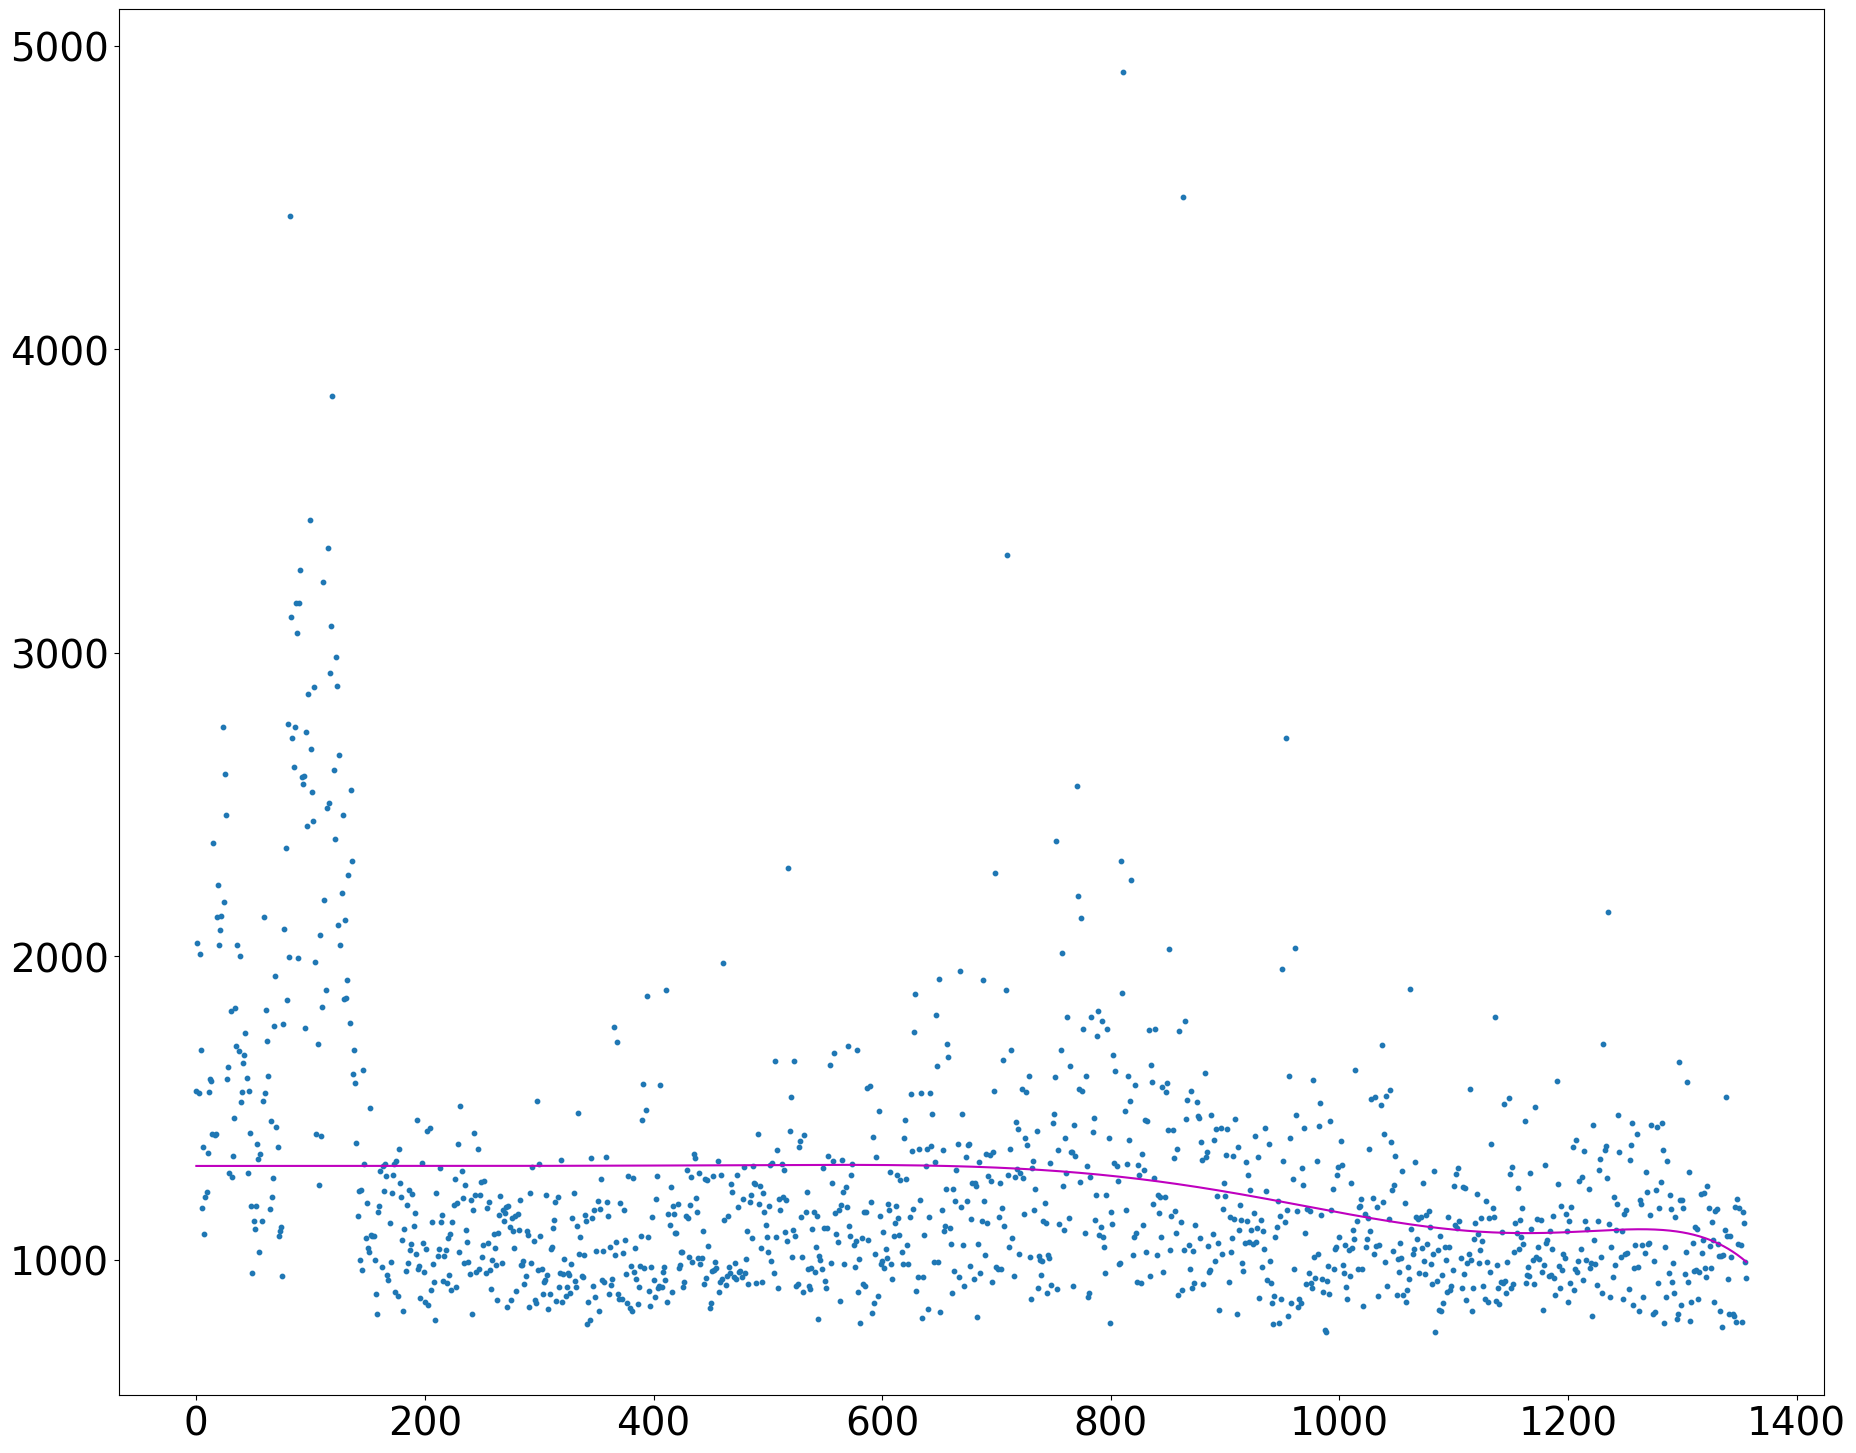

In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
# x = 2 - 3 * np.random.normal(0, 1, 20)
# y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
dataset = pd.read_csv('/Users/alan/Downloads/AOS99/dtfcsv.csv')
# [50:200]
x = np.array(dataset['ID']).reshape(-1, 1)
y = np.array(dataset['Temps']).reshape(-1, 1)
print(len(x), len(y))
# X = dataset.iloc[:, 1].values
# y = dataset.iloc[:, 2].values

# # transforming the data to include another axis
# x = x[:, np.newaxis]
# y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=10)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
# dataset = pd.read_csv('./Sample Data/PART 2. REGRESSION - Polynomial Regression - Polynomial_Regression/Polynomial_Regression/Position_Salaries.csv')
dataset = pd.read_csv('/Users/alan/Downloads/AOS99/dtfcsv.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
# X = dtf['DateTime'].values
# y = dtf['Temps'].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

"""
# Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
"""

# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
# lin_reg = LinearRegression()
# lin_reg.fit(X, y)

# viz_linear()

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=50)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

viz_polymonial()
# viz_polymonial_smooth()

# Predicting a new result with Linear Regression
lin_reg.predict([[5.5]])
#output should be 249500

# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_reg.fit_transform([[5.5]]))
#output should be 132148.43750003

ValueError: Expected 2D array, got 1D array instead:
array=[17301.69634259 17301.69704861 17301.6977662  ... 17302.66444444
 17302.66516204 17302.66587963].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

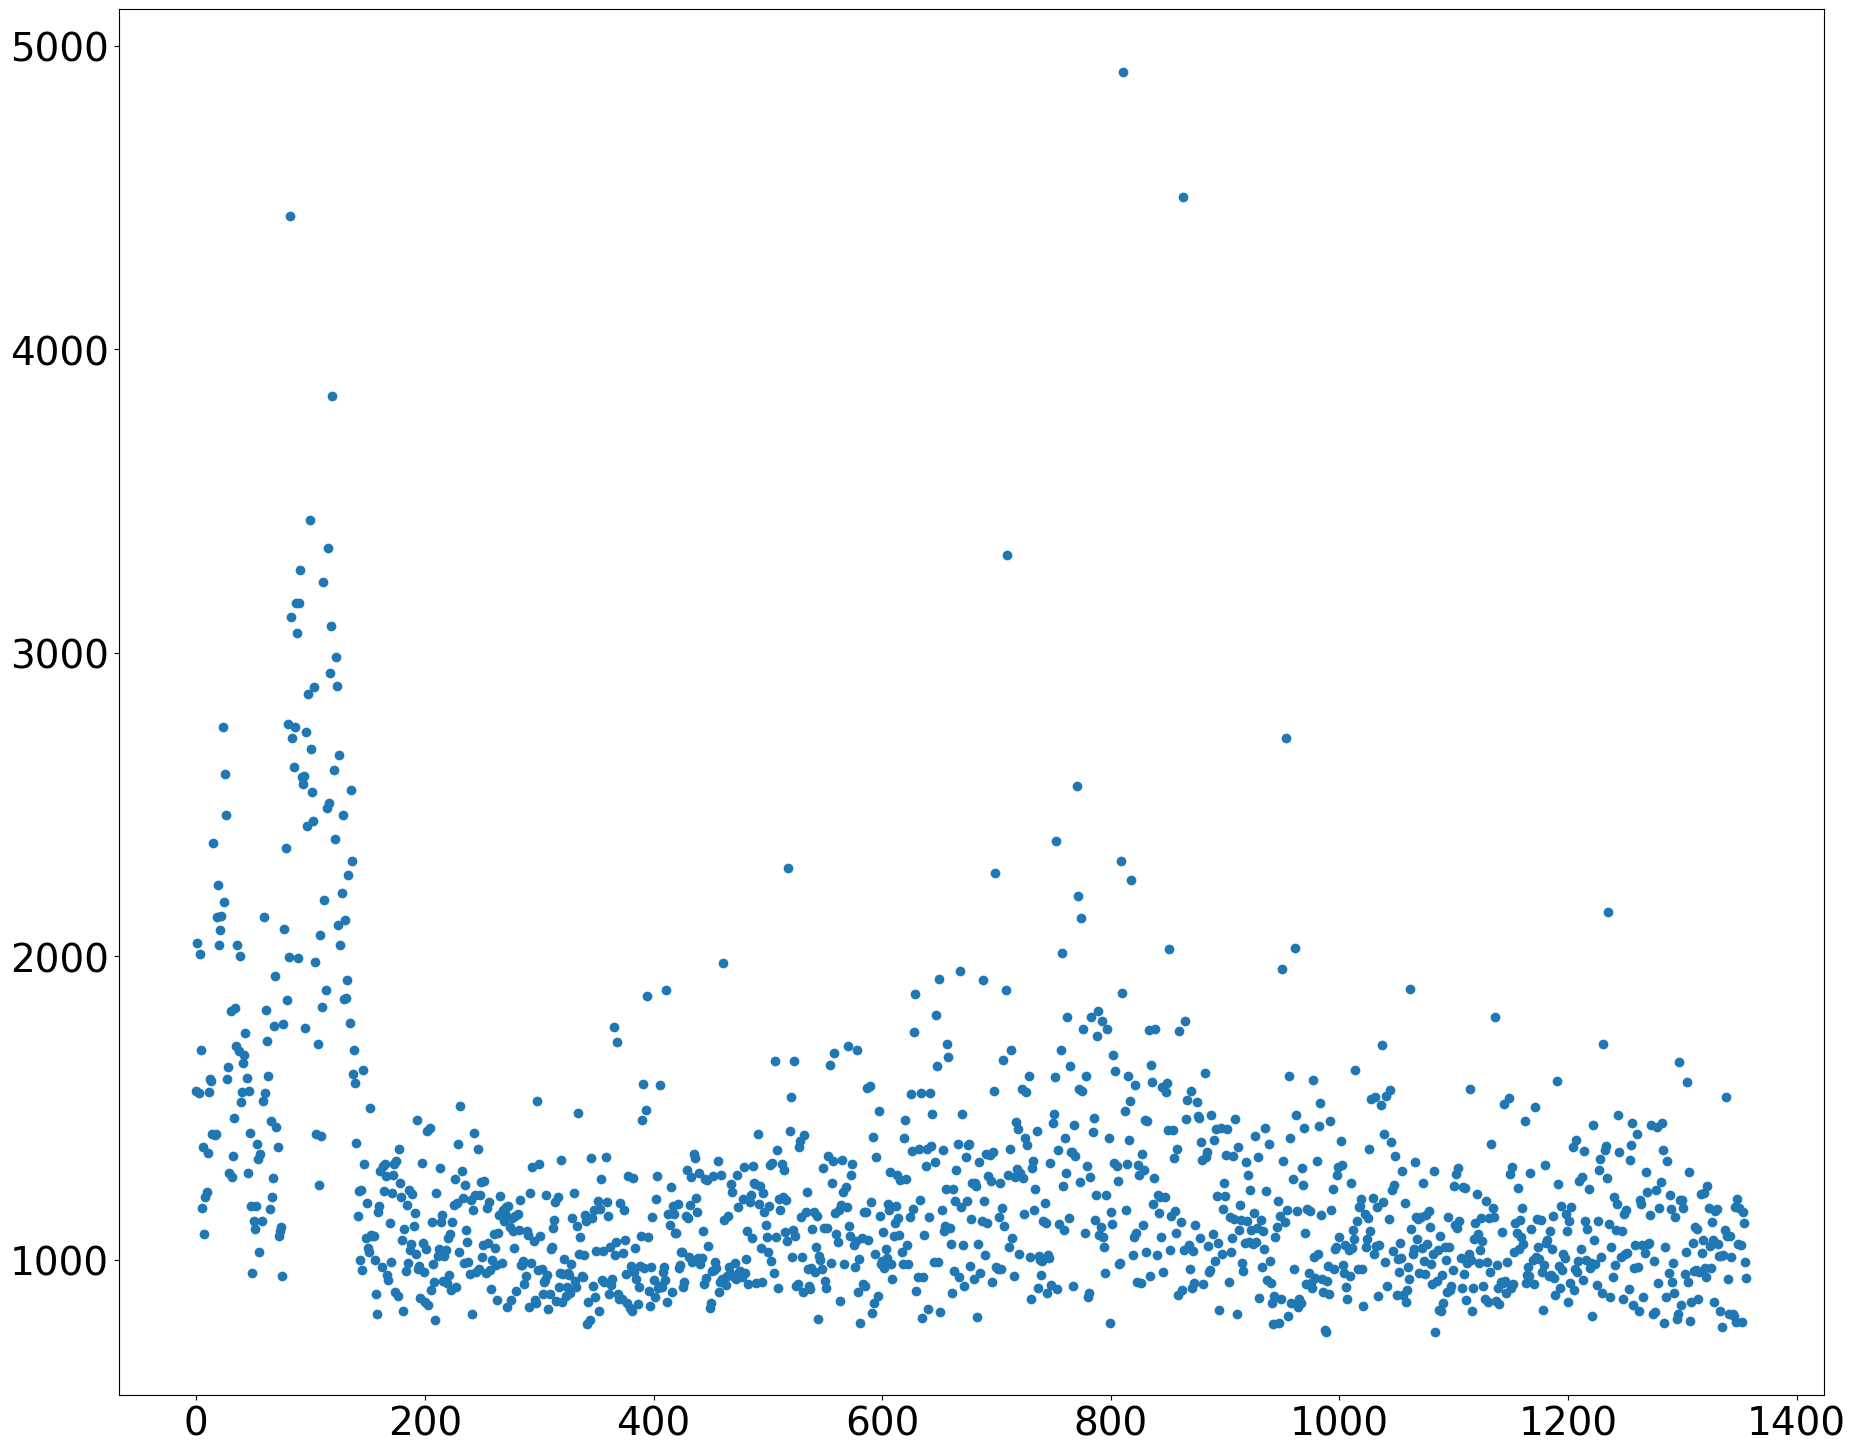

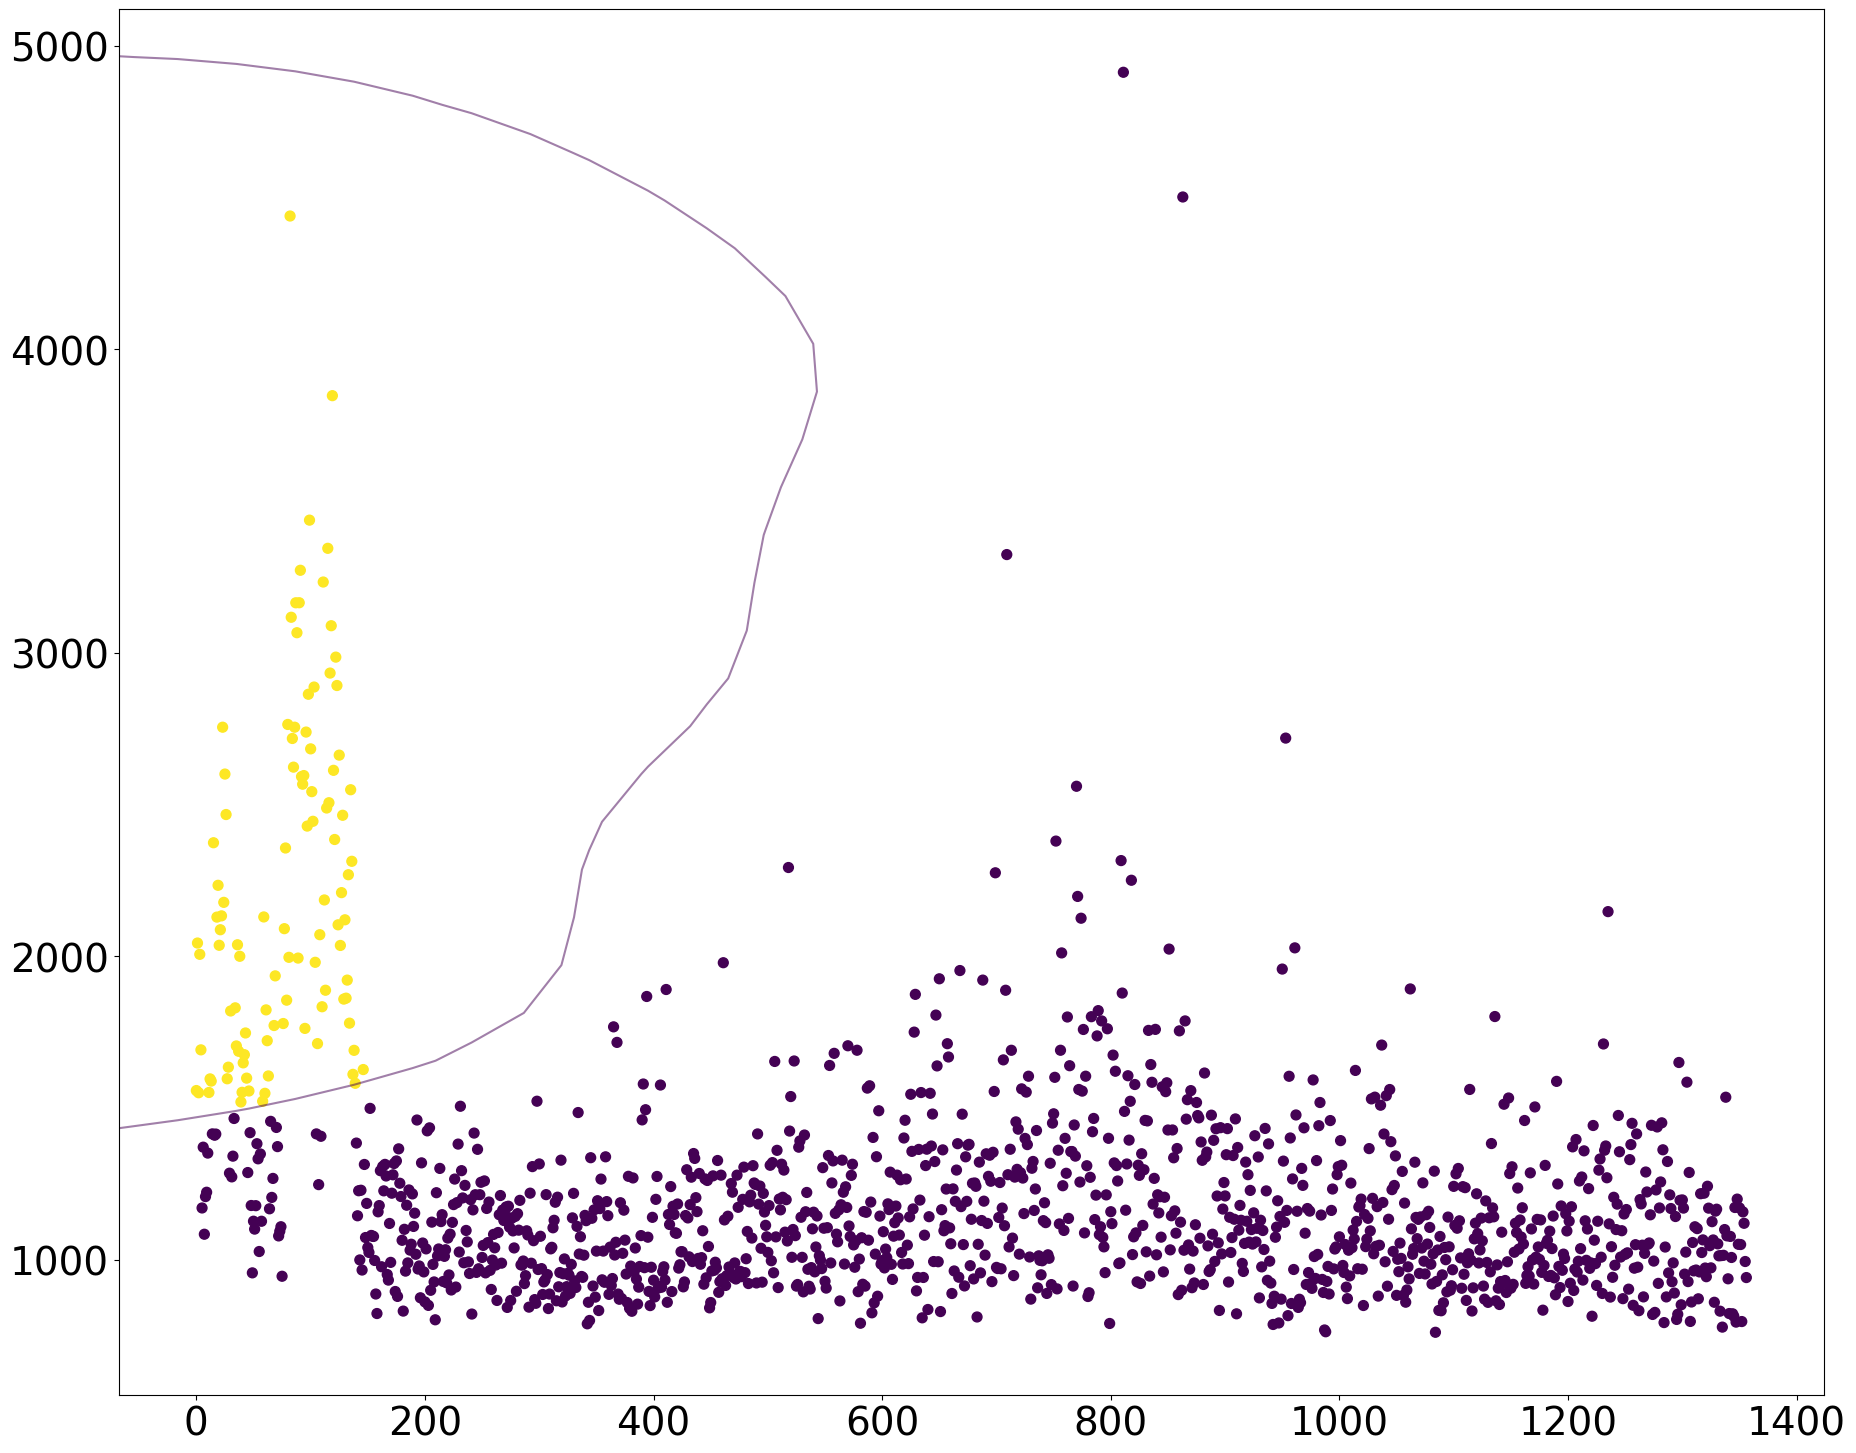

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


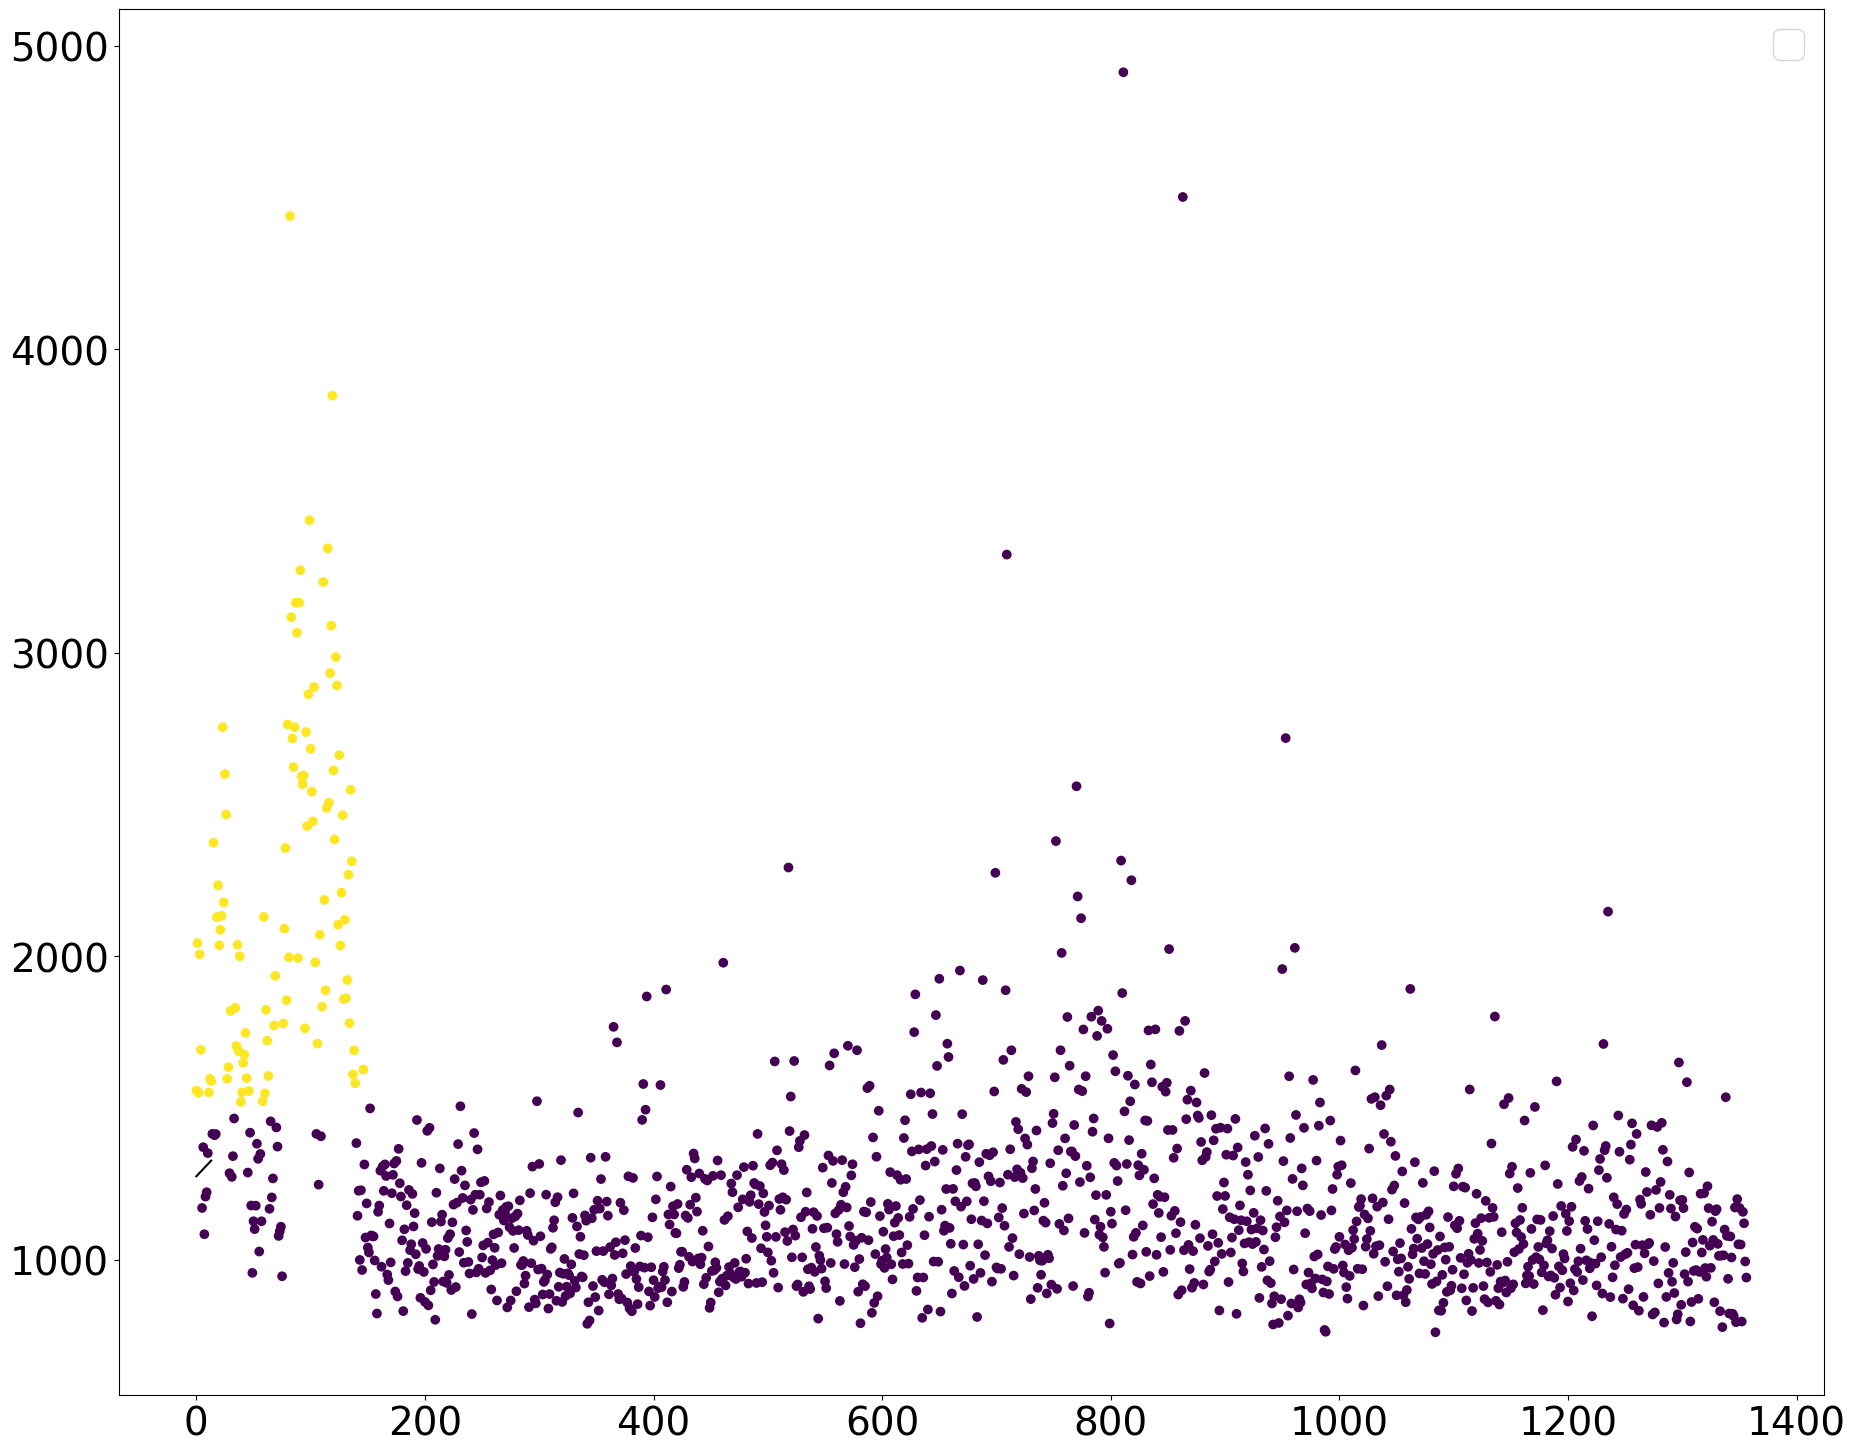

In [ ]:
from sklearn import datasets
from sklearn import svm

# Plot the decision boundary for a non-linear SVM problem
def plot_decision_boundary(model, ax=None):
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)

	# shape data
    xy = np.vstack([X.ravel(), Y.ravel()]).T

    # get the decision boundary based on the model
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary
    ax.contour(X, Y, P,
               levels=[0], alpha=0.5,
               linestyles=['-'])

# linear data
# X = np.array([1, 5, 1.5, 8, 1, 9, 7, 8.7, 2.3, 5.5, 7.7, 6.1])
# y = np.array([2, 8, 1.8, 8, 0.6, 11, 10, 9.4, 4, 3, 8.8, 7.5])
X = np.array(dataset['ID'])
y = np.array(dataset['Temps'])

# show unclassified data
plt.scatter(X, y)
plt.show()

# shaping data for training the model
training_X = np.vstack((X, y)).T
training_y = [1 if dataset['ID'][i] < 200  and dataset['Temps'][i] > 1500 else 0 for i in range(len(dataset['ID']))]

# define the model
clf = svm.SVC(kernel='linear', C=1.0)

# train the model
clf.fit(training_X, training_y)

nonlinear_clf = svm.SVC(kernel='rbf', C=1.0)

# training non-linear model
nonlinear_clf.fit(training_X, training_y)

# plot data and decision boundary
plt.scatter(training_X[:, 0], training_X[:, 1], c=training_y, s=50)
plot_decision_boundary(nonlinear_clf)
plt.scatter(nonlinear_clf.support_vectors_[:, 0], nonlinear_clf.support_vectors_[:, 1], s=50, lw=1, facecolors='none')
plt.show()

# get the weight values for the linear equation from the trained SVM model
w = clf.coef_[0]

# get the y-offset for the linear equation
a = -w[0] / w[1]

# make the x-axis space for the data points
XX = np.linspace(0, 13)

# get the y-values to plot the decision boundary
yy = a * XX - clf.intercept_[0] / w[1]

# plot the decision boundary
plt.plot(XX, yy, 'k-')

# show the plot visually
plt.scatter(training_X[:, 0], training_X[:, 1], c=training_y)
plt.legend()
plt.show()